In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Df Packages
import pandas as pd
import numpy as np
from plotnine import *

# Data/Model Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

# Pipeline Imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

# Dendrogram Imports
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

#**Behavioral Clustering**

In [ ]:
# Read the Data
behavioral = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_behavioral.csv")
behavioral.dropna(inplace = True)
behavioral.reset_index(inplace = True, drop = True)

In [ ]:
behavioral.columns

Index(['age', 'current_income', 'time_spent_browsing',
       'length_of_subscription', 'monthly_visits', 'longest_read_time',
       'gender', 'prop_ads_clicked', 'id'],
      dtype='object')

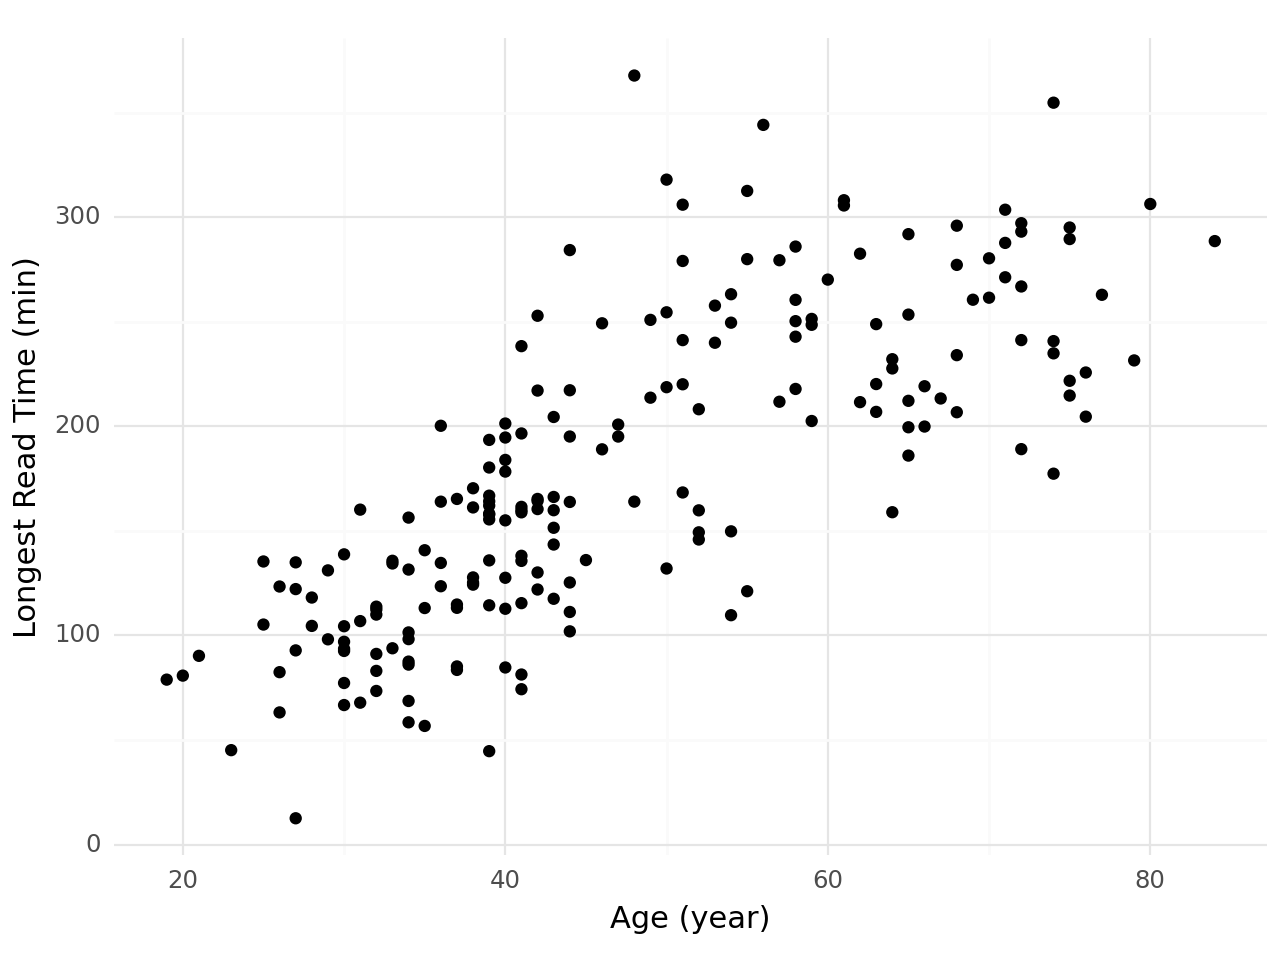

<Figure Size: (640 x 480)>

In [ ]:
# Age and Longest Read Time
(ggplot(behavioral, aes(x = 'age', y = 'longest_read_time')) + geom_point() +
 theme_minimal() +
 labs(x = "Age (year)", y = "Longest Read Time (min)"))

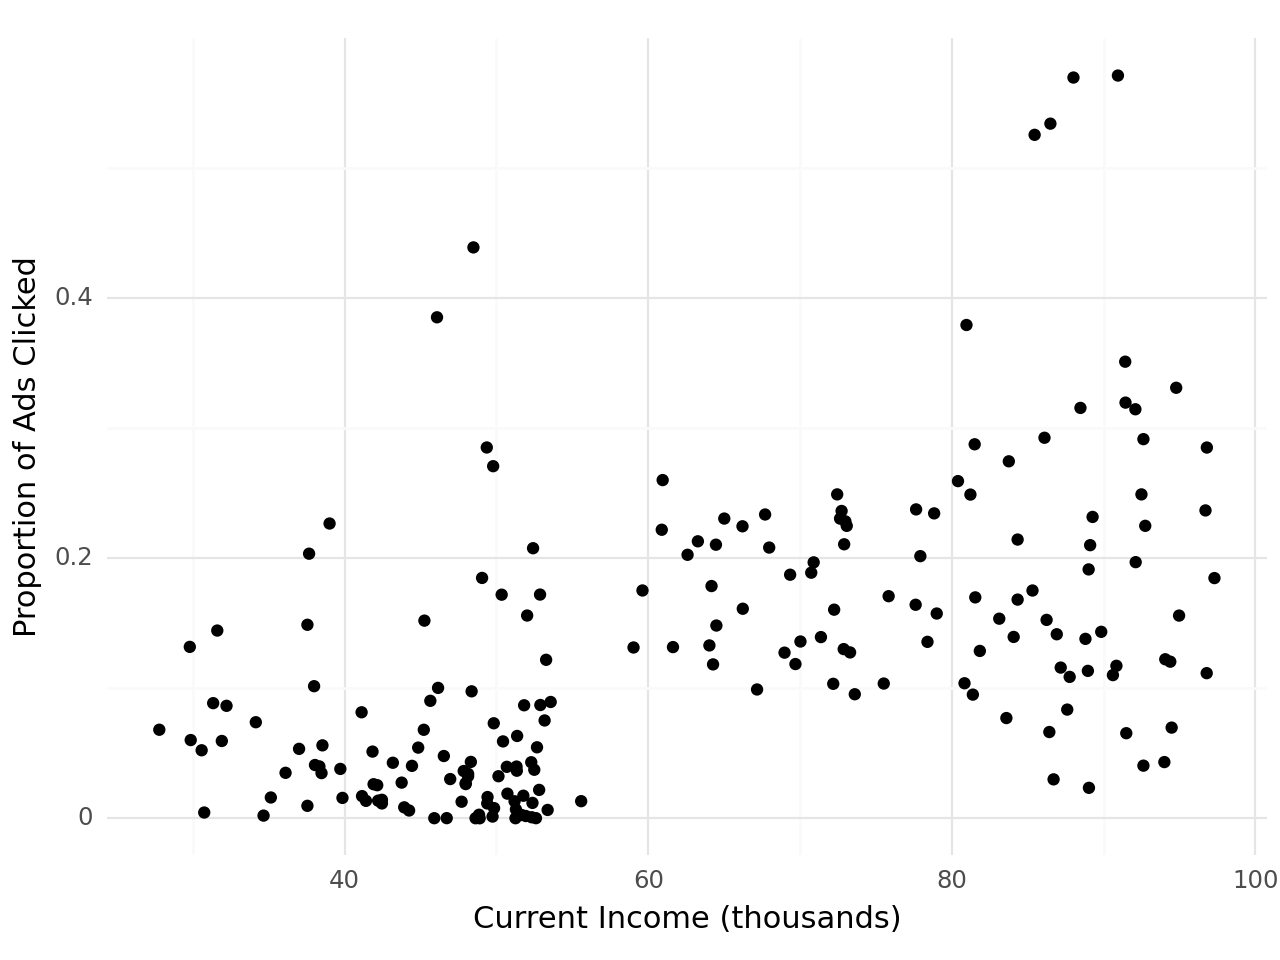

<Figure Size: (640 x 480)>

In [ ]:
# Current Income and Propotion of Ads Clicked
(ggplot(behavioral, aes(x = 'current_income', y = 'prop_ads_clicked')) + geom_point() +
 theme_minimal() +
 labs(x = "Current Income (thousands)", y = "Proportion of Ads Clicked"))

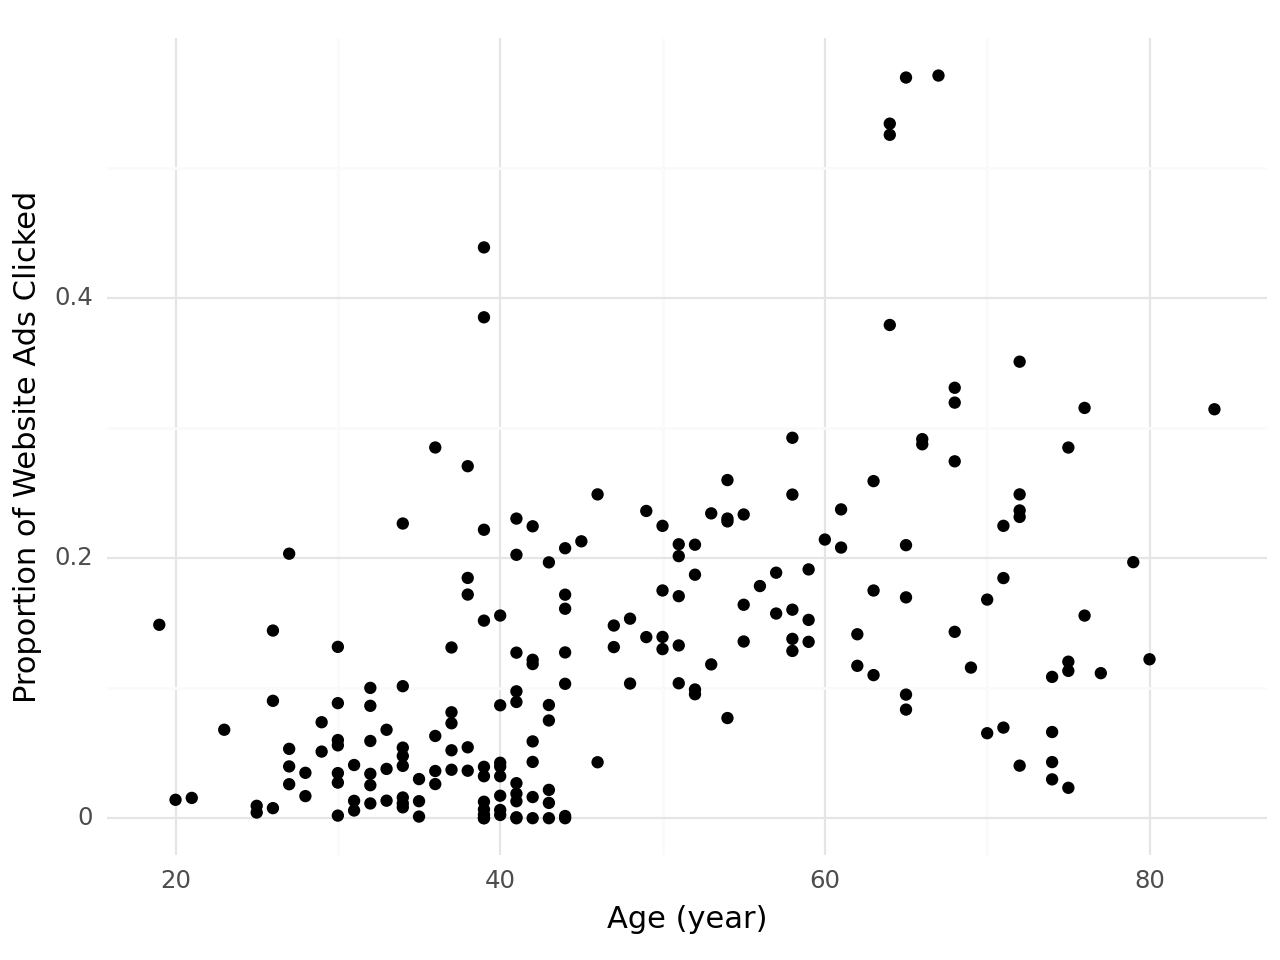

<Figure Size: (640 x 480)>

In [ ]:
# Age and Prop Ad Clicks
(ggplot(behavioral, aes(x = 'age', y = 'prop_ads_clicked')) + geom_point() +
  theme_minimal() +
 labs(x = "Age (year)", y = "Proportion of Website Ads Clicked"))

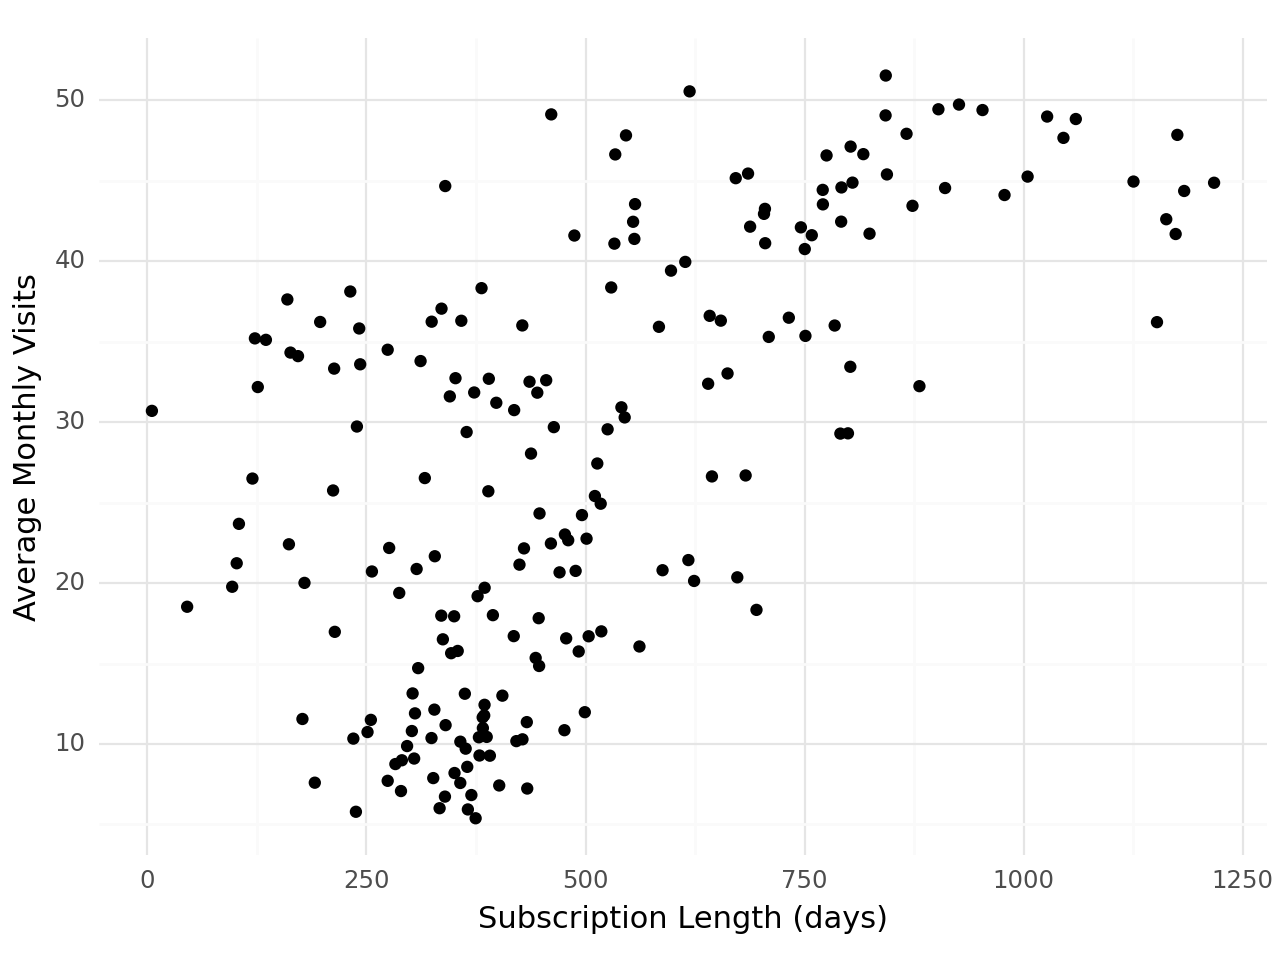

<Figure Size: (640 x 480)>

In [ ]:
# Length of Subscription of Monthly Visits
(ggplot(behavioral, aes(x = 'length_of_subscription', y = 'monthly_visits')) + geom_point() +
 theme_minimal() +
 labs(x = 'Subscription Length (days)', y = 'Average Monthly Visits'))

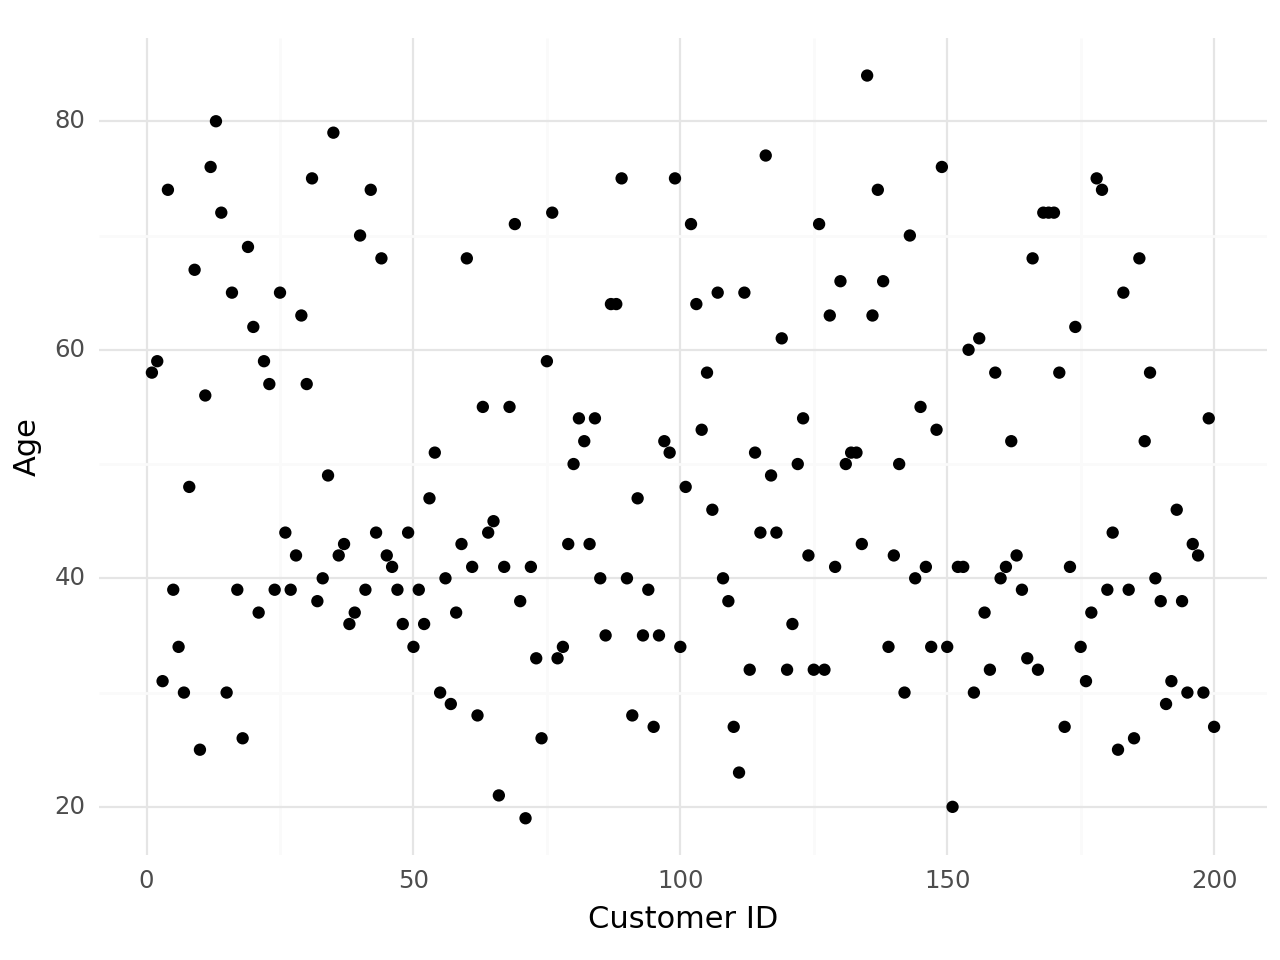

<Figure Size: (640 x 480)>

In [ ]:
# ID and Age
(ggplot(behavioral, aes(x = 'id', y = 'age')) + geom_point() +
 theme_minimal() +
 labs(x = 'Customer ID', y = 'Age'))

#K-Means


*   Simple clustering model
*   Spherical Clusters
*   Roughly the same # in each cluster
*   Cohesion (Low) and Separation (High)

# Gaussian Mixture Models


*   Soft (probabilistic) Assignment
*   Variances can be different
*   Explicitly model # of data points
* Works well with overlapping clusters



# DBSCAN


* Does not require specifying the number of clusters in advance.
* Can discover clusters of arbitrary shapes and sizes.
* Robust to noise and outliers.
* Effective for high-density, low-density, and unevenly sized clusters.
* Sensitive to overlapping clusters



# Hierarchical Clustering


* Provides a tree-like structure (dendrogram) that can offer insights into cluster hierarchy.
* No need to specify the number of clusters in advance.
*Can handle various types of data, including categorical and numerical.
*Allows for agglomerative (bottom-up) or divisive (top-down) clustering.



## STEP 2
* Using sklearn Pipelines, build and fit one clustering models (choose from K-Means, Gaussian Mixture Models, DBSCAN, and Hierarchical Clustering) using all the continuous/interval variables except id.
* Appropriately Z-score continuous/interval variables.
* Choose the number of clusters (if applicable) and in the Methods section of your report, explain how you chose. Also explain why/how you chose any relevant hyperparameters (such as linkage, distance metric, eps, min samples...).

In [ ]:
names = ["age", "current_income", "time_spent_browsing", "prop_ads_clicked", "longest_read_time", "length_of_subscription", "monthly_visits"]
X = behavioral[names]

z = make_column_transformer((StandardScaler(), names),
                             remainder = "passthrough")

km = KMeans(n_clusters = 2)
pca = PCA(n_components = 2)

pipe_pca = Pipeline([
    ("z", z),
    ("pca", pca)
])

# fit pipeline and grab cluster assignments
labels = pipe_pca.fit(X)

# create empty pipeline
k_pipe = Pipeline([
    ("z", z),
    (" s", km)
])

labels = k_pipe.fit_predict(X)
print("K-Means - Silhouette Score: ", silhouette_score(X, k_pipe.predict(X)))

behavioral["clusters"] = labels
behavioral[["pc1", "pc2"]] = pd.DataFrame(pipe_pca.transform(behavioral[names]))

K-Means - Silhouette Score:  0.3814260294060013


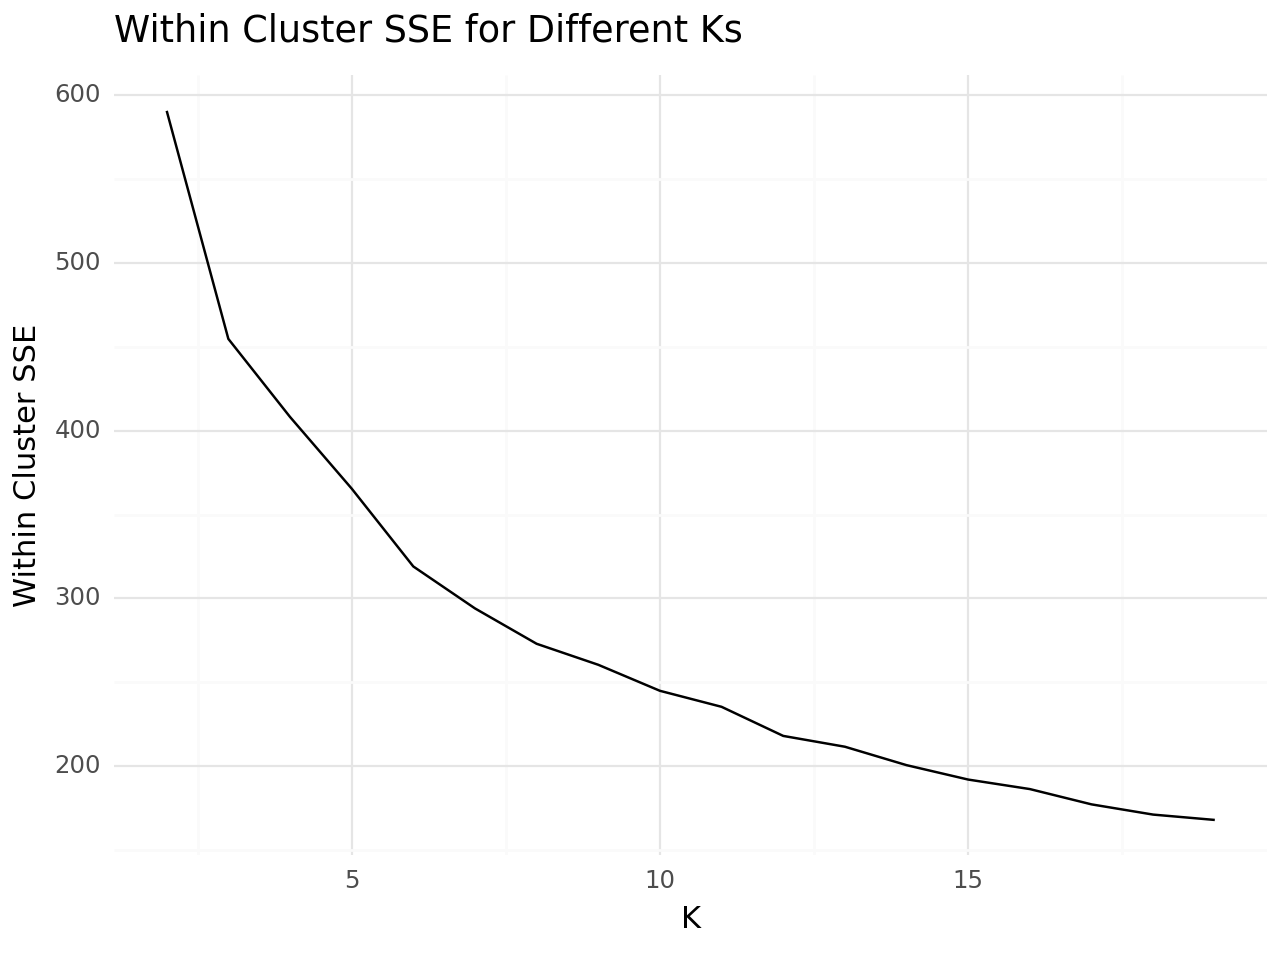

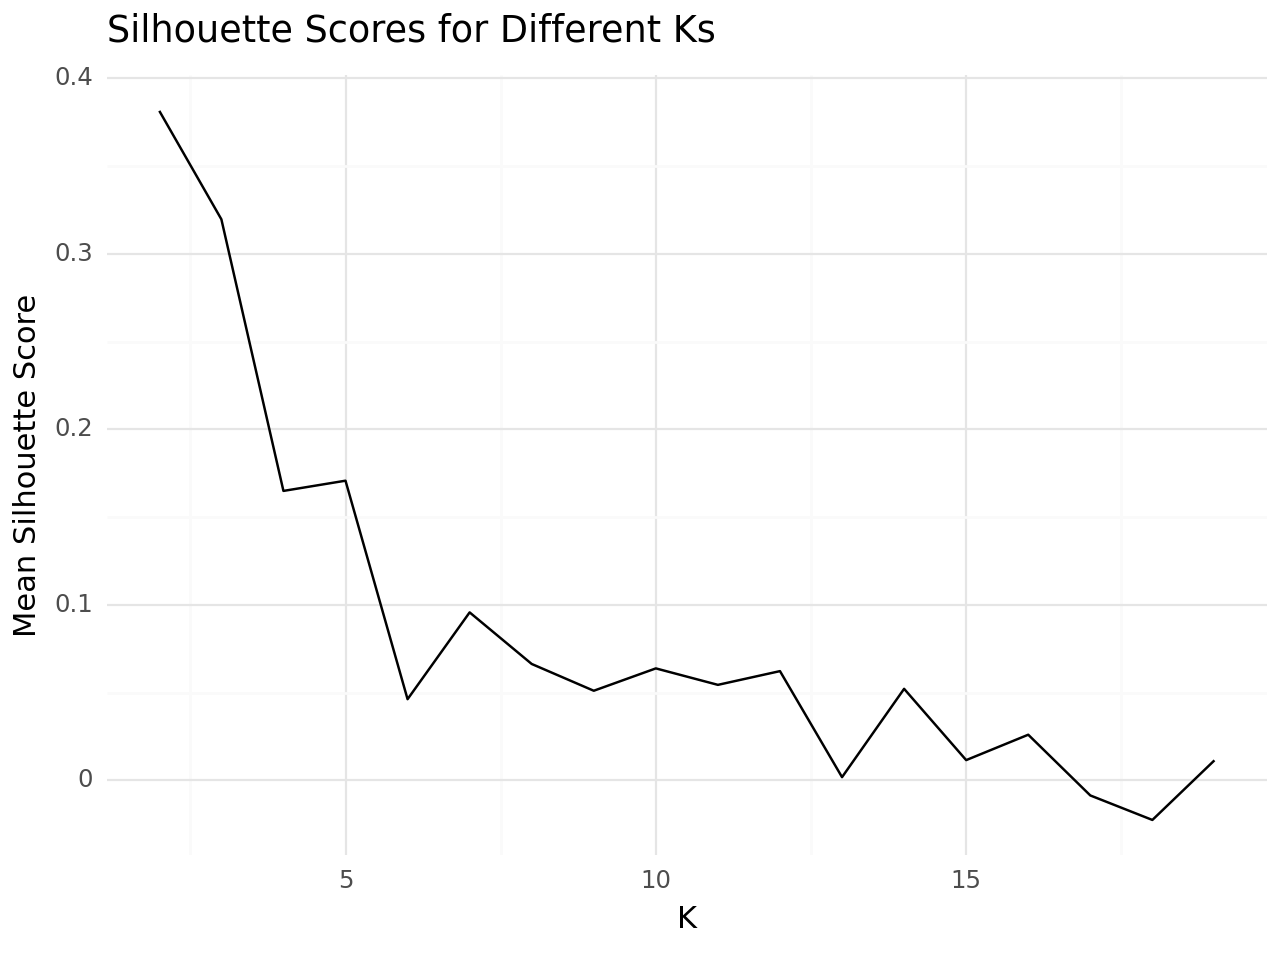

In [ ]:
metrics = {"SSE": [], "sil": [], "k": []}
for i in range(2,20):
    km = KMeans(i)
    pipe = Pipeline([
        ("pre", z),
        ("km", km)
    ])

    labels = pipe.fit_predict(X[names])
    sil = silhouette_score(X[names], labels)
    sse = pipe.named_steps["km"].inertia_

    metrics["SSE"].append(sse)
    metrics["sil"].append(sil)
    metrics["k"].append(i)

df = pd.DataFrame(metrics)

print(ggplot(df, aes(x = "k", y = "SSE")) +
  geom_line() + theme_minimal() +
    labs(x = "K", y = "Within Cluster SSE",
         title = "Within Cluster SSE for Different Ks"))

print(ggplot(df, aes(x = "k", y = "sil")) +
  geom_line() + theme_minimal() +
    labs(x = "K", y = "Mean Silhouette Score",
         title = "Silhouette Scores for Different Ks"))

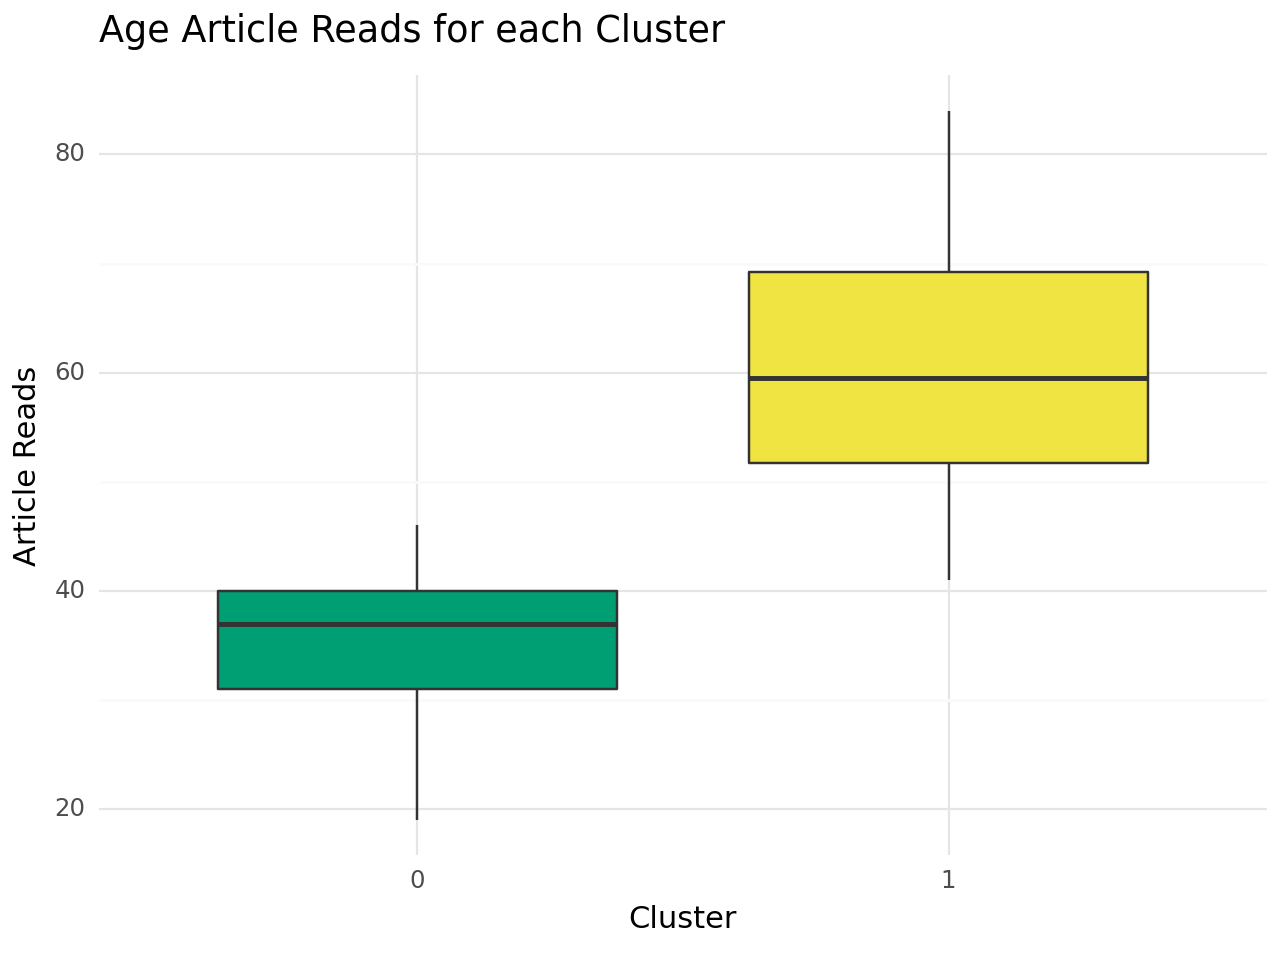

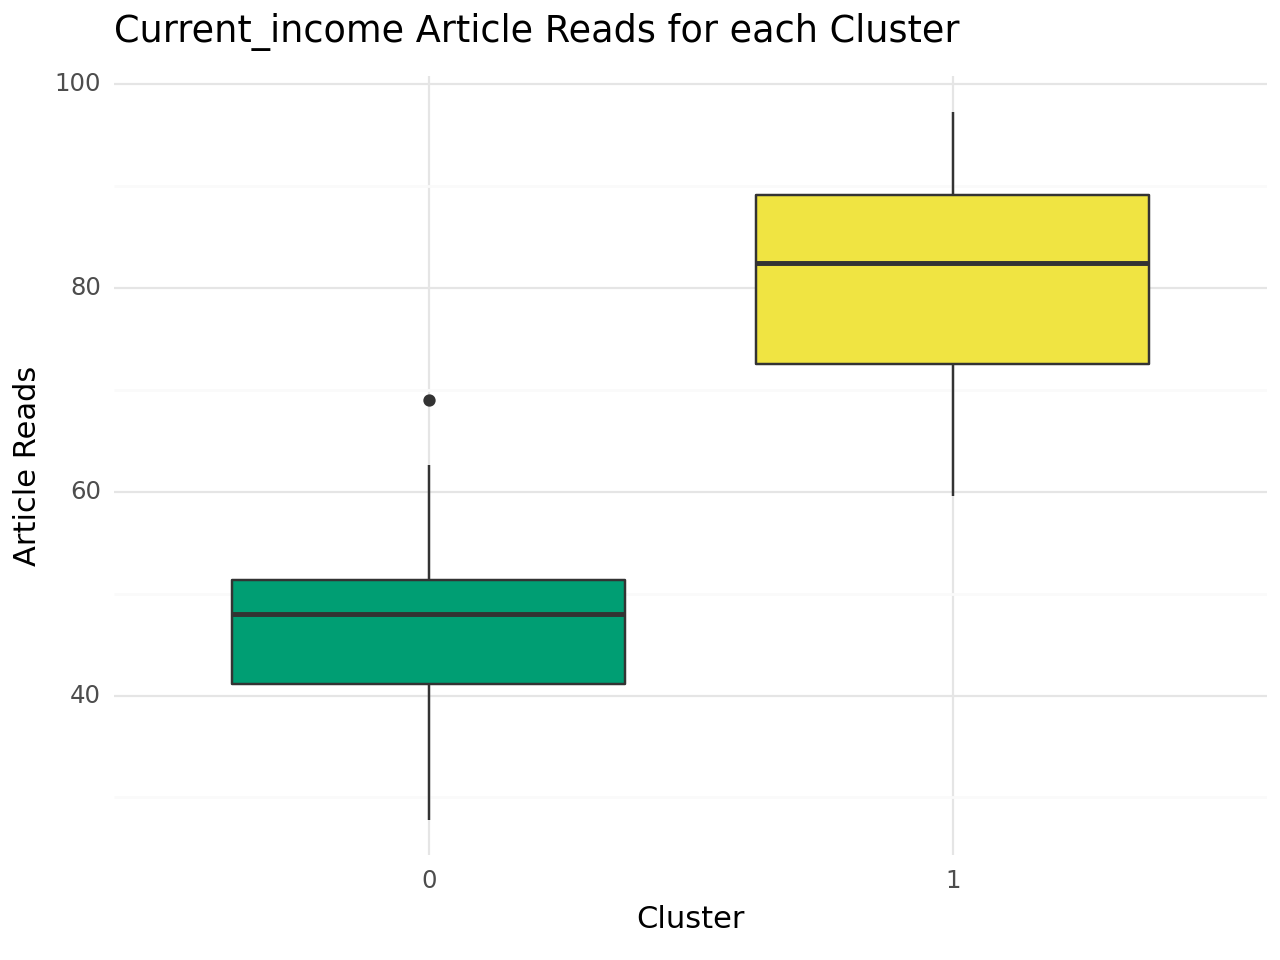

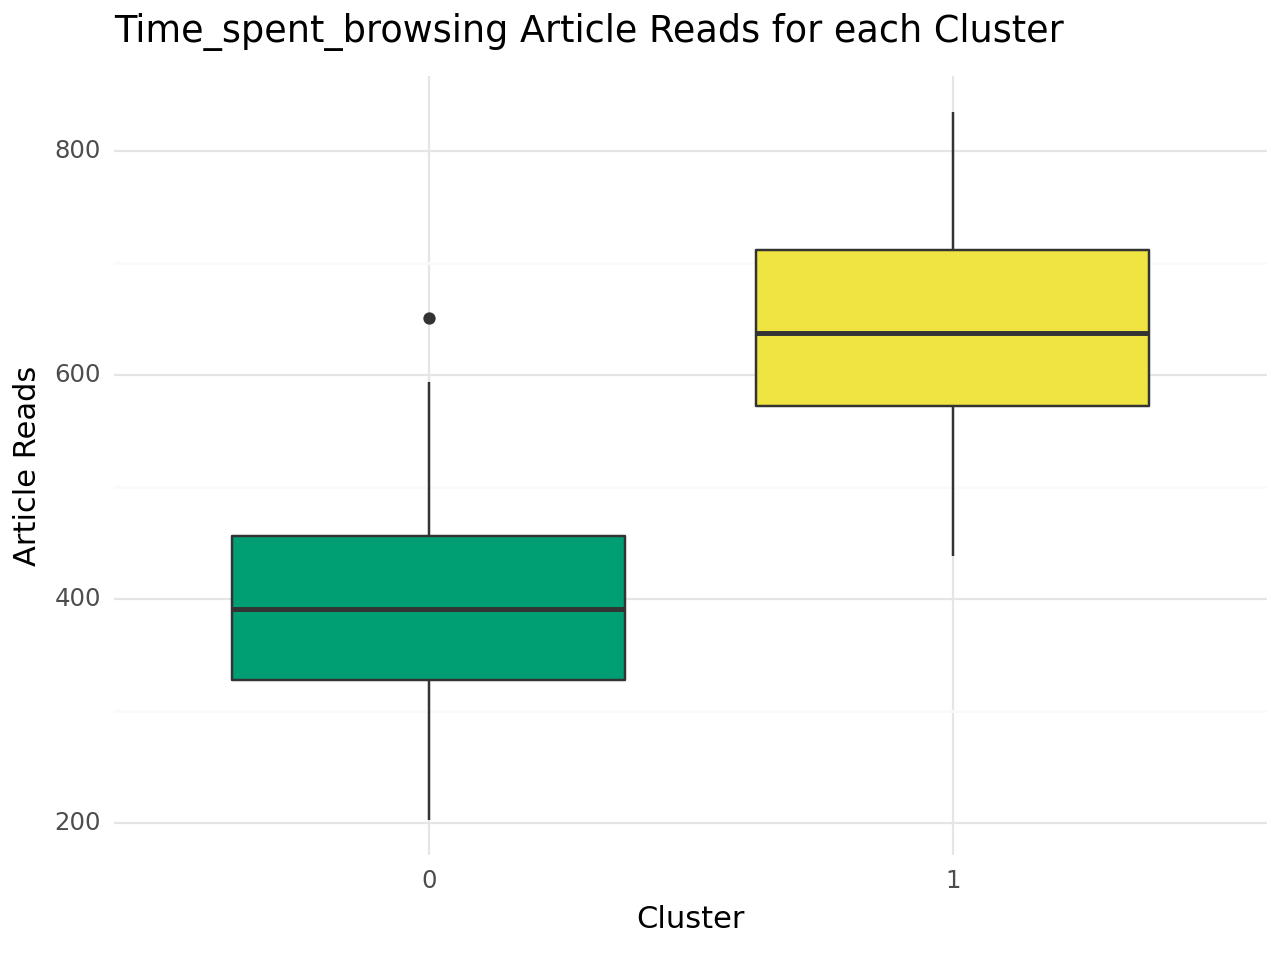

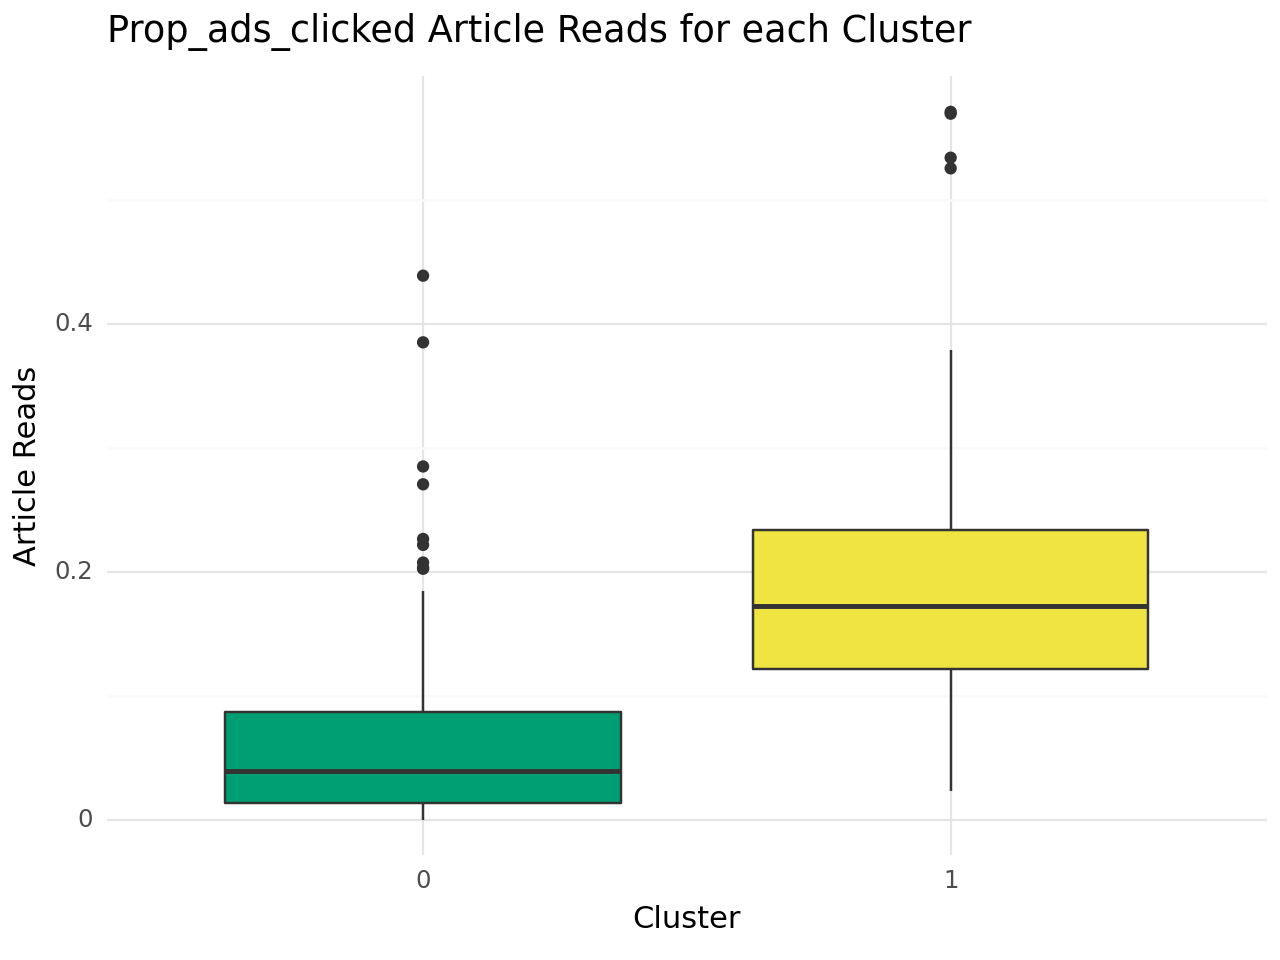

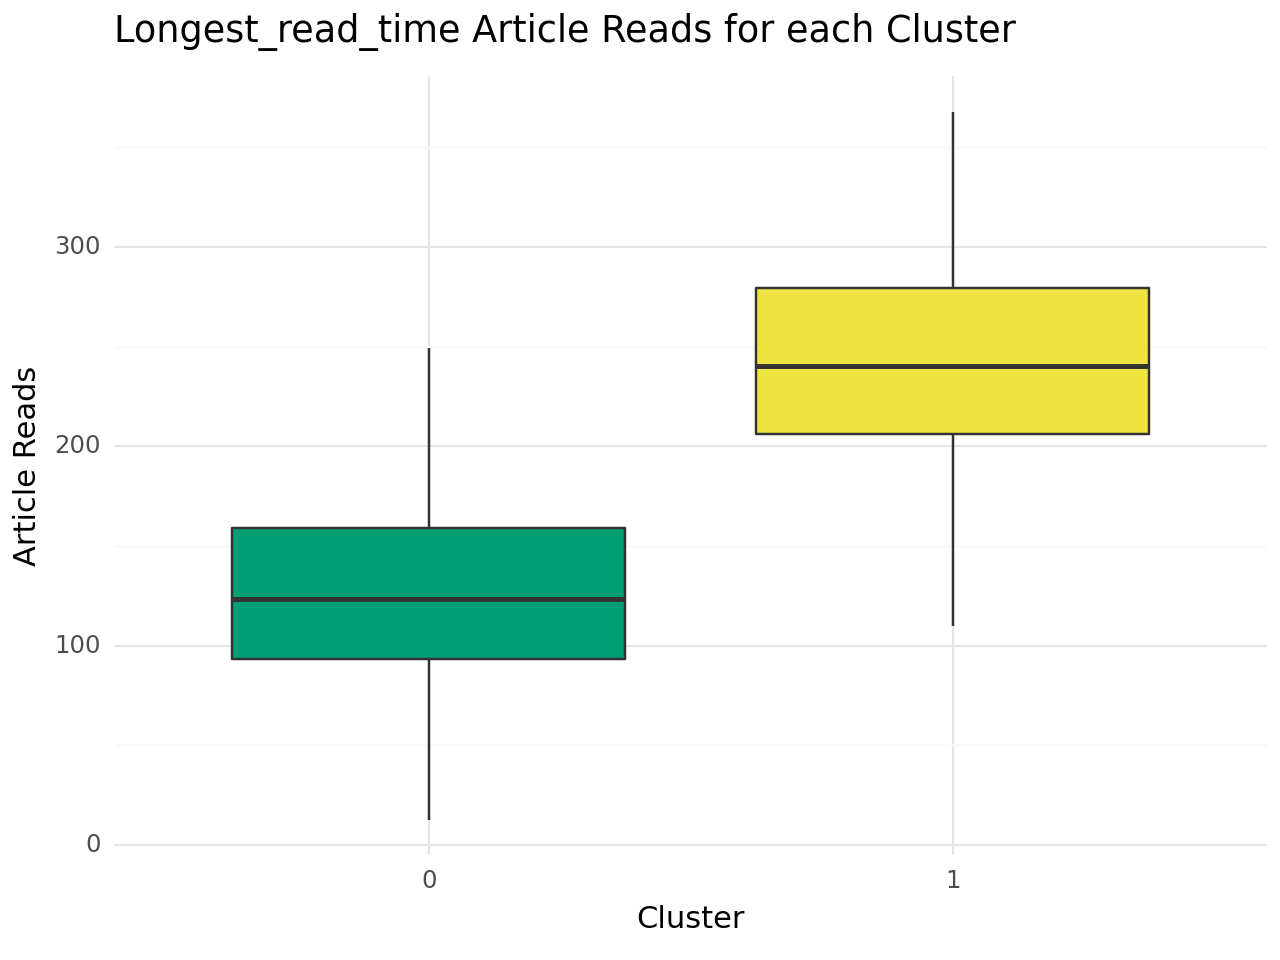

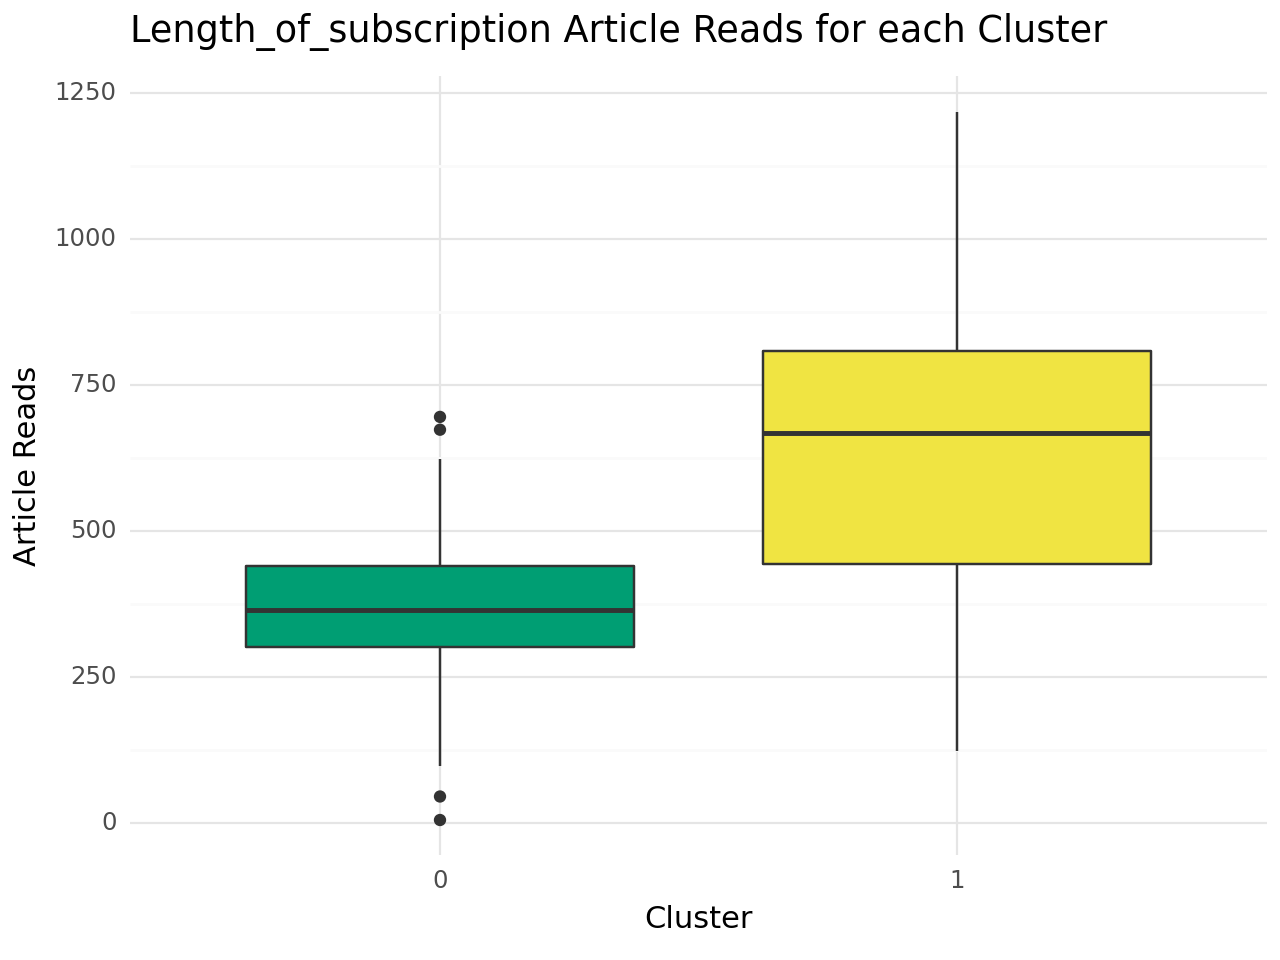

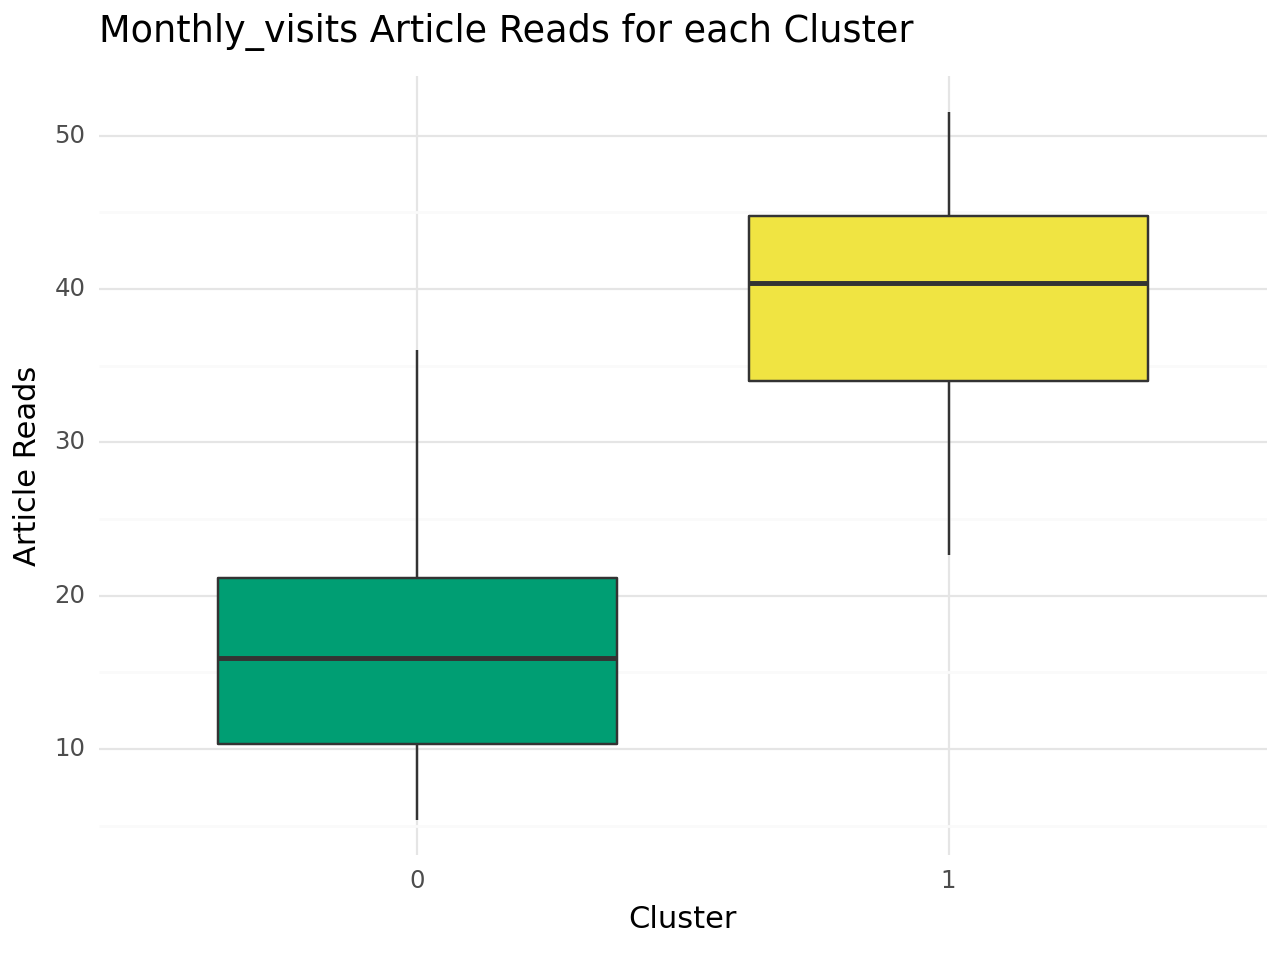

In [ ]:
for read in names:
    title = read.capitalize() + " Article Reads for each Cluster"
    print(ggplot(behavioral, aes(x="factor(clusters)", y=read)) +
            geom_boxplot(fill=["#009e73", "#f0e442"]) +
            theme_minimal() +
            labs(x="Cluster", y="Article Reads", title=title))

In [ ]:
behavioral.head()

,age,current_income,time_spent_browsing,length_of_subscription,monthly_visits,longest_read_time,gender,prop_ads_clicked,id,clusters,pc1,pc2
0,44,72.19,566.839925,351.582980,32.736695,163.867691,woman,0.103480,64,1,0.090591,0.146935
1,37,59.03,593.367495,427.828363,36.015413,114.804382,nonbinary,0.131423,58,0,-0.313201,0.384569
2,41,62.59,558.474711,455.073149,32.610060,74.286961,man,0.202710,161,0,-0.317613,0.875111
3,47,61.63,546.606458,436.046753,32.516673,195.150214,woman,0.131722,92,1,0.220413,0.150457
4,55,67.70,679.886891,880.950477,32.240694,280.023385,other,0.233705,63,1,2.123852,-0.040148


## STEP 3
* Using plotnine and PCA, create a scatterplot of your clusters by plotting the first Principal Component (PC1) on the x-axis, and the second Principal Component (PC2) on the y-axis. Color the points by their cluster. Include this plot in your Results Section.

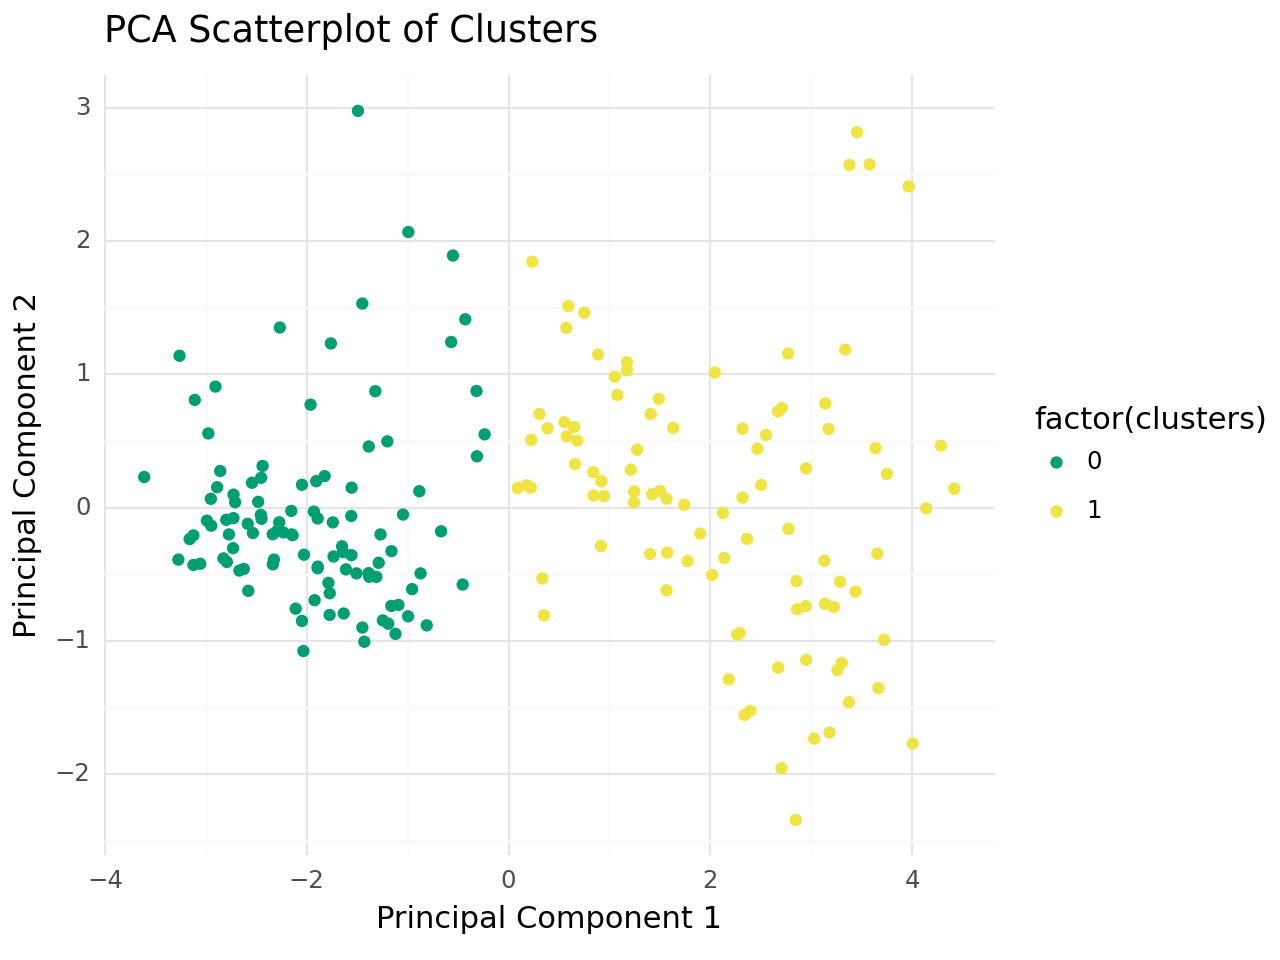

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(behavioral, aes(x = "pc1", y = "pc2", color = "factor(clusters)")) + geom_point() +
  scale_fill_manual(values=["#009e73", "#f0e442"]) +
  scale_color_manual(values=["#009e73", "#f0e442"]) +
  theme_minimal()+
  labs(title = 'PCA Scatterplot of Clusters', x = 'Principal Component 1', y = 'Principal Component 2'))

## STEP 4
* Create at least one other summary of what kind of customers are in each cluster. This could be a different ggplot (built using plotnine), or a neatly formatted summary table (hint: groupby()). In the Results section, discuss in detail:
    * what kind of customers are in each cluster
    * how the clusters "performed" (e.g. are they good clusters? How can you tell?)
    * how that information might help the company

In [ ]:
group1 = behavioral.groupby("clusters").get_group(0)
group2 = behavioral.groupby("clusters").get_group(1)

In [ ]:
summary_table1 = group1.agg({
    'age': ['mean', 'std'],
    'current_income': ['mean', 'std'],
    'time_spent_browsing': ['mean', 'std'],
    'length_of_subscription': ['mean', 'std'],
    'monthly_visits': ['mean', 'std'],
    'longest_read_time': ['mean', 'std'],
    'prop_ads_clicked': ['mean', 'std'],
    'id': ['mean', 'std']
})
print("Cluster 1 Customers \n------")
print(summary_table1)
print("\nGender Breakdown \n-------")
print(group1["gender"].value_counts())


summary_table_tidy = pd.DataFrame(summary_table1)

Cluster 1 Customers 
------
            age  current_income  time_spent_browsing  length_of_subscription  \
mean  35.461538       45.883269           393.648870              363.865335   
std    6.028932        7.673129            87.957752              125.827447   

      monthly_visits  longest_read_time  prop_ads_clicked          id  
mean       16.359703         125.511883          0.068072  100.384615  
std         7.231839          42.500277          0.080471   57.530626  

Gender Breakdown 
-------
woman        72
man          18
nonbinary    10
other         4
Name: gender, dtype: int64


In [ ]:
summary_table2 = group2.agg({
    'age': ['mean', 'std'],
    'current_income': ['mean', 'std'],
    'time_spent_browsing': ['mean', 'std'],
    'length_of_subscription': ['mean', 'std'],
    'monthly_visits': ['mean', 'std'],
    'longest_read_time': ['mean', 'std'],
    'prop_ads_clicked': ['mean', 'std'],
    'id': ['mean', 'std']
})
print("Cluster 2 Customers \n------")
print(summary_table2)
print("\nGender Breakdown \n-------")
print(group2["gender"].value_counts())

Cluster 2 Customers 
------
            age  current_income  time_spent_browsing  length_of_subscription  \
mean  60.406250       80.967604           644.289422              645.185354   
std   10.536731       10.350437            97.867123              276.412273   

      monthly_visits  longest_read_time  prop_ads_clicked          id  
mean       39.371600         236.601634          0.192475  100.625000  
std         6.670343          53.736743          0.105534   58.556361  

Gender Breakdown 
-------
woman        63
man          24
nonbinary     5
other         4
Name: gender, dtype: int64


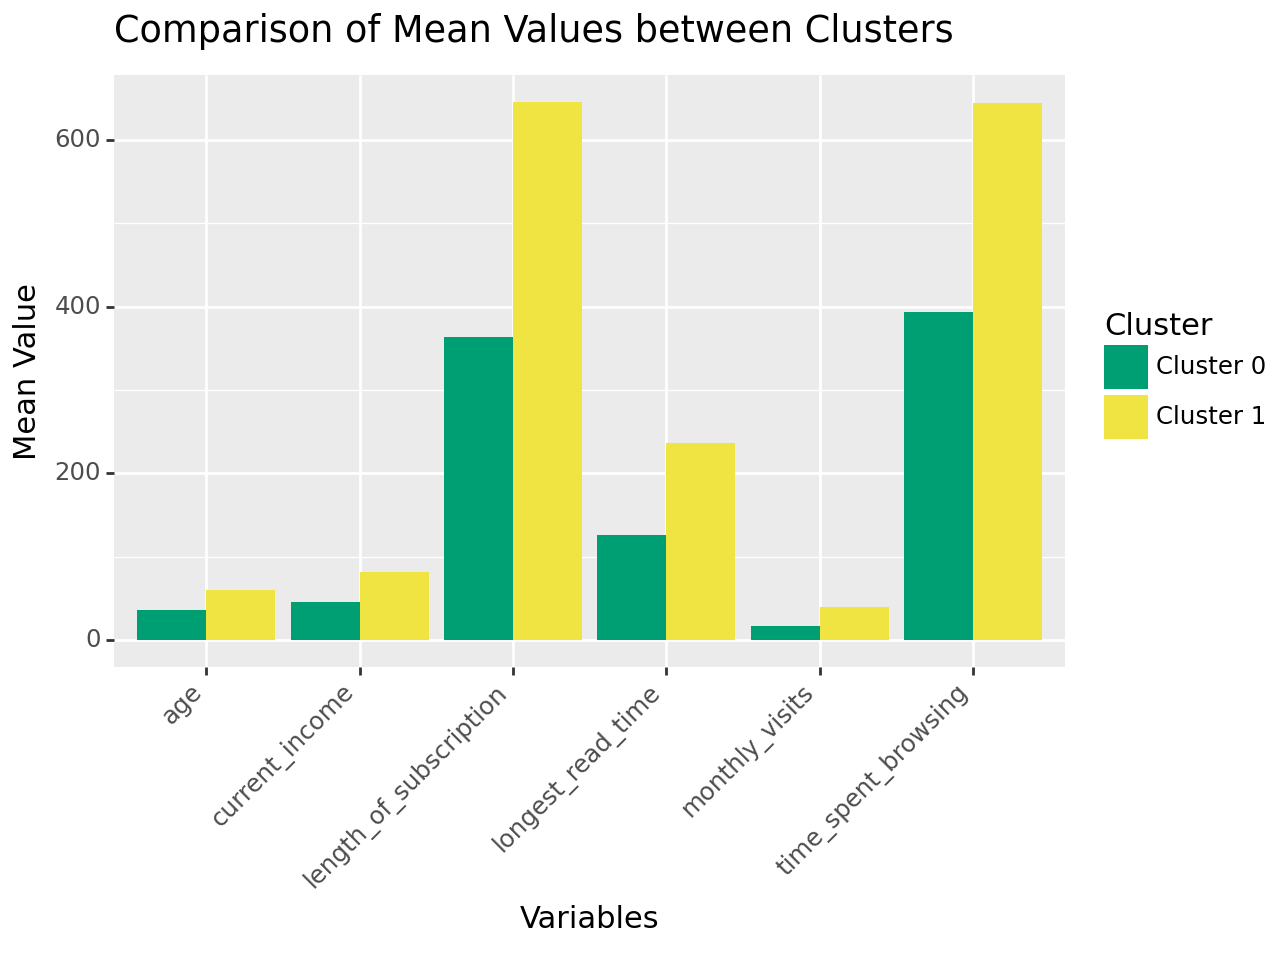

<Figure Size: (640 x 480)>

In [ ]:
# Assuming 'group1' and 'group2' are your pandas DataFrames
# Extract mean values for each cluster
group1var = group1[["age", "current_income", "length_of_subscription", "longest_read_time", "monthly_visits", "time_spent_browsing"]]
group2var = group2[["age", "current_income", "length_of_subscription", "longest_read_time", "monthly_visits", "time_spent_browsing"]]

group1_means = group1var.mean().reset_index()
group2_means = group2var.mean().reset_index()

# Melt the DataFrames to long format for ggplot
group1_melted = pd.melt(group1_means, id_vars=['index'])
group2_melted = pd.melt(group2_means, id_vars=['index'])

# Add a column to distinguish between the two clusters
group1_melted['cluster'] = 'Cluster 0'
group2_melted['cluster'] = 'Cluster 1'

# Combine the two melted DataFrames
combined_means = pd.concat([group1_melted, group2_melted])

# Create a side-by-side bar plot
(ggplot(combined_means, aes(x='index', y='value', fill='cluster')) +
  geom_bar(stat='identity', position='dodge') +
  scale_fill_manual(values=["#009e73", "#f0e442"]) +
  labs(title='Comparison of Mean Values between Clusters',
       x='Variables', y='Mean Value', fill='Cluster') +
  theme(axis_text_x=element_text(angle=45, hjust=1)))

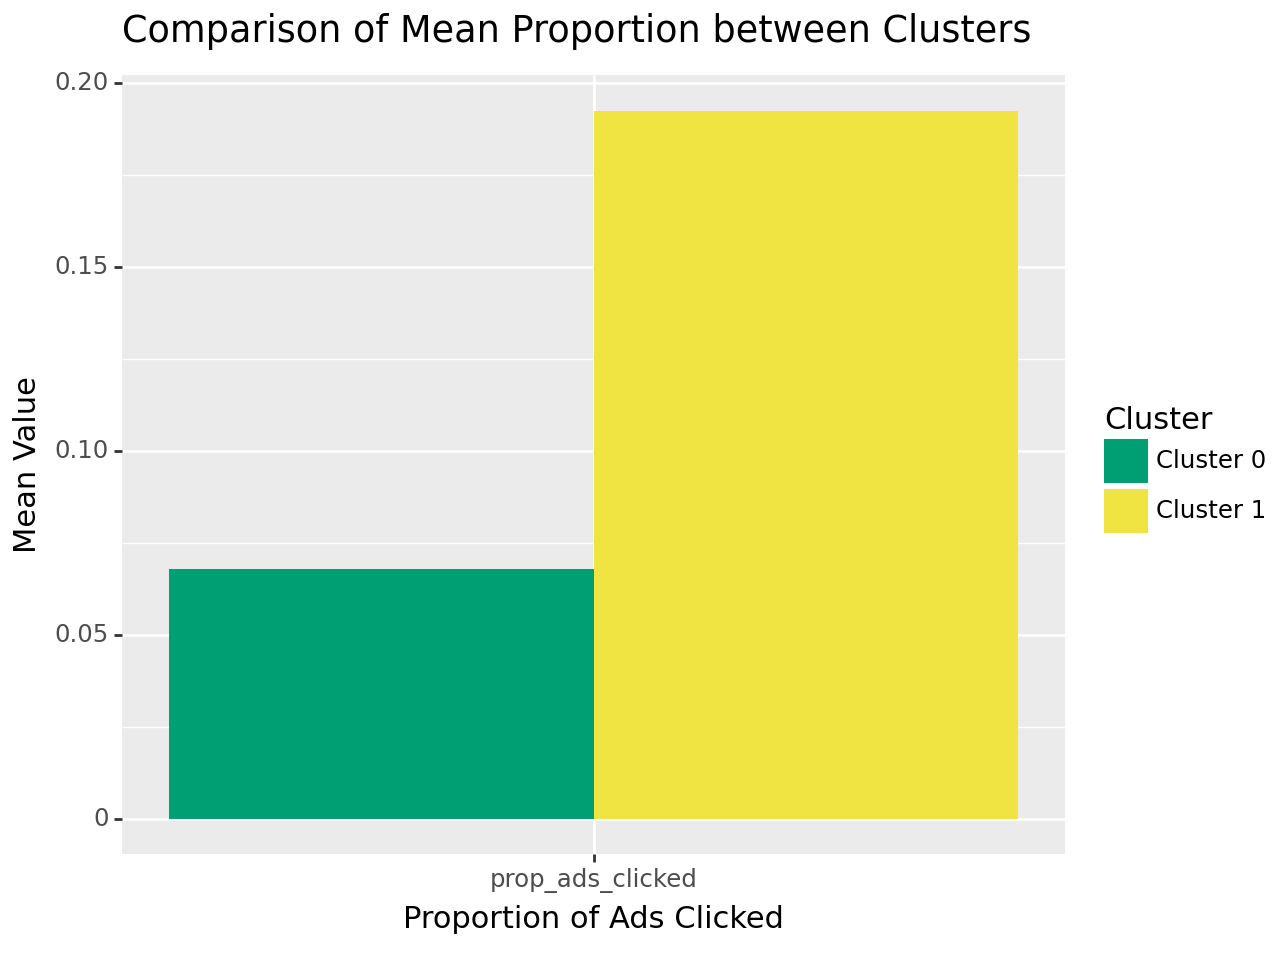

<Figure Size: (640 x 480)>

In [ ]:
# Assuming 'group1' and 'group2' are your pandas DataFrames
# Extract values for the two variables from each cluster
variable_comparison = pd.concat([
    group1[['prop_ads_clicked']].mean().reset_index().assign(Cluster='Cluster 0'),
    group2[['prop_ads_clicked']].mean().reset_index().assign(Cluster='Cluster 1')
])

# Melt the DataFrame to long format for ggplot
variable_melted = pd.melt(variable_comparison, id_vars=['index', 'Cluster'])

# Create a scatter plot
(ggplot(variable_melted, aes(x='index', y='value', fill='Cluster')) +
  geom_bar(stat='identity', position='dodge') +
  scale_fill_manual(values=["#009e73", "#f0e442"]) +
  labs(title='Comparison of Mean Proportion between Clusters',
    x='Proportion of Ads Clicked', y='Mean Value', color='Cluster'))

#**Article Clustering**

In [ ]:
article = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_topics.csv")
article.dropna(inplace = True)
article.reset_index(inplace = True, drop = True)

article.head()

,Stocks,Productivity,Fashion,Celebrity,Cryptocurrency,Science,Technology,SelfHelp,Fitness,AI,id
0,3,12,9,9,1,1,5,1,0,1,84
1,1,0,1,1,0,8,4,10,4,0,59
2,4,1,11,1,6,11,0,9,0,0,161
3,2,6,8,1,15,1,1,9,8,0,40
4,1,2,4,4,6,6,2,1,3,4,98


In [ ]:
article.columns

Index(['Stocks', 'Productivity', 'Fashion', 'Celebrity', 'Cryptocurrency',
       'Science', 'Technology', 'SelfHelp', 'Fitness', 'AI', 'id'],
      dtype='object')

## STEP 1
Using an sklearn Pipeline, build and fit a Hierarchical Clustering model using all the variables except id. Use cosine similarity as your distance metric (also called affinity) and average linkage.
* Do not z-score, as these are counts.

In [ ]:
variables = ['Stocks', 'Productivity', 'Fashion', 'Celebrity', 'Cryptocurrency', 'Science', 'Technology', 'SelfHelp', 'Fitness', 'AI']
X = article[variables]

hcm = AgglomerativeClustering(affinity = "cosine",
                              linkage = "average",
                              distance_threshold = 0,
                              n_clusters = None) # come back and change the number of clusters
pipe = Pipeline([("model", hcm)])

labels = pipe.fit_predict(X)

## STEP 2
Create a dendrogram and in the Methods section of your report, explain what number of cluster you decided to use and why.

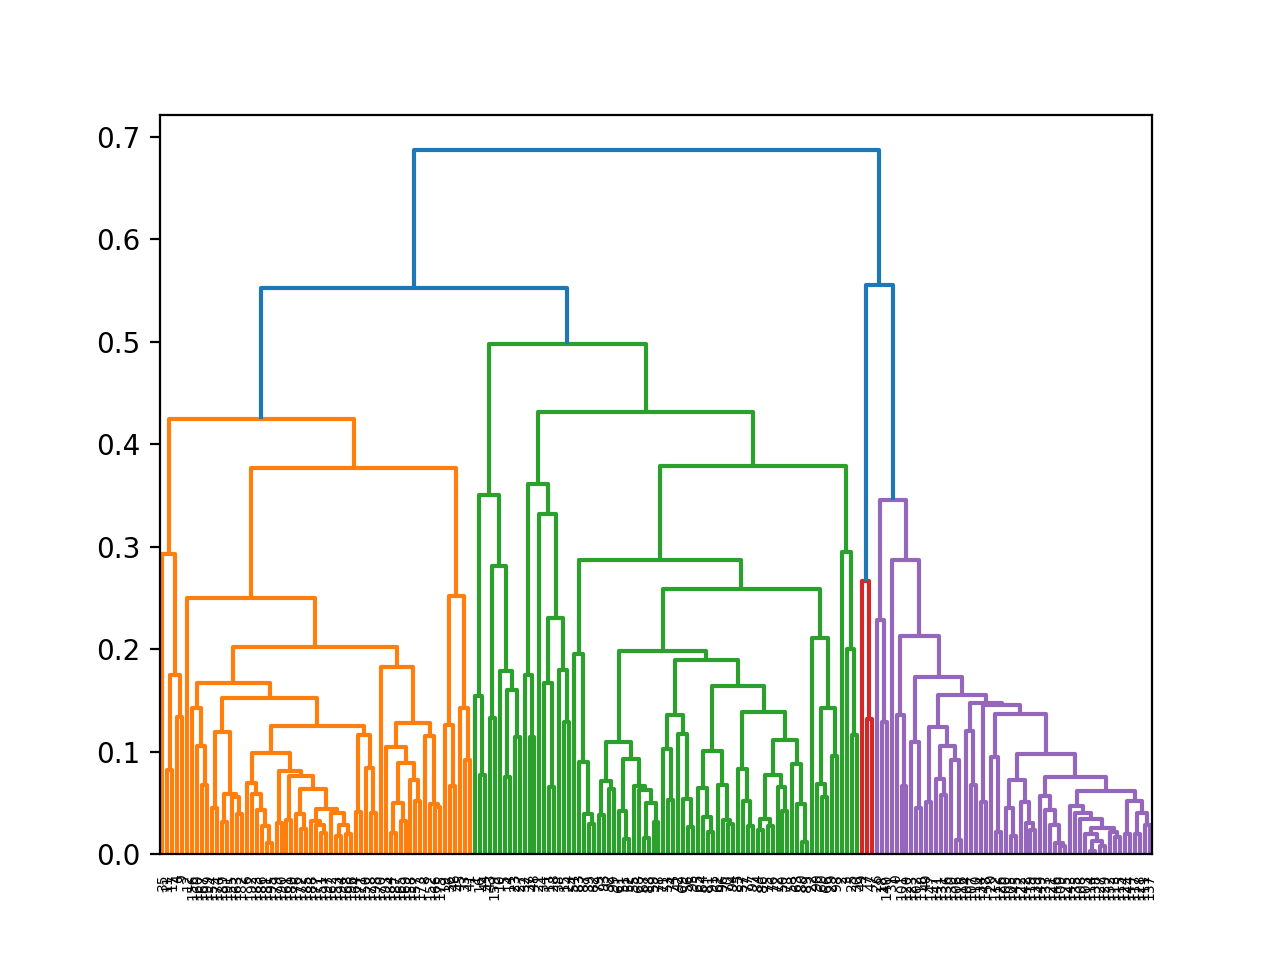

In [ ]:
# from sklearn: https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
def plot_dendrogram(pipe, **kwargs):

    if "model" not in pipe.named_steps.keys():
        raise NameError("Your clustering pipeline step must be called 'model' for this function to work.")

    # create the counts of samples under each node
    counts = np.zeros(pipe.named_steps["model"].children_.shape[0])
    n_samples = len(pipe.named_steps["model"].labels_)
    for i, merge in enumerate(pipe.named_steps["model"].children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [pipe.named_steps["model"].children_, pipe.named_steps["model"].distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)


plot_dendrogram(pipe, color_threshold = 0.5)

0.14884793072334204


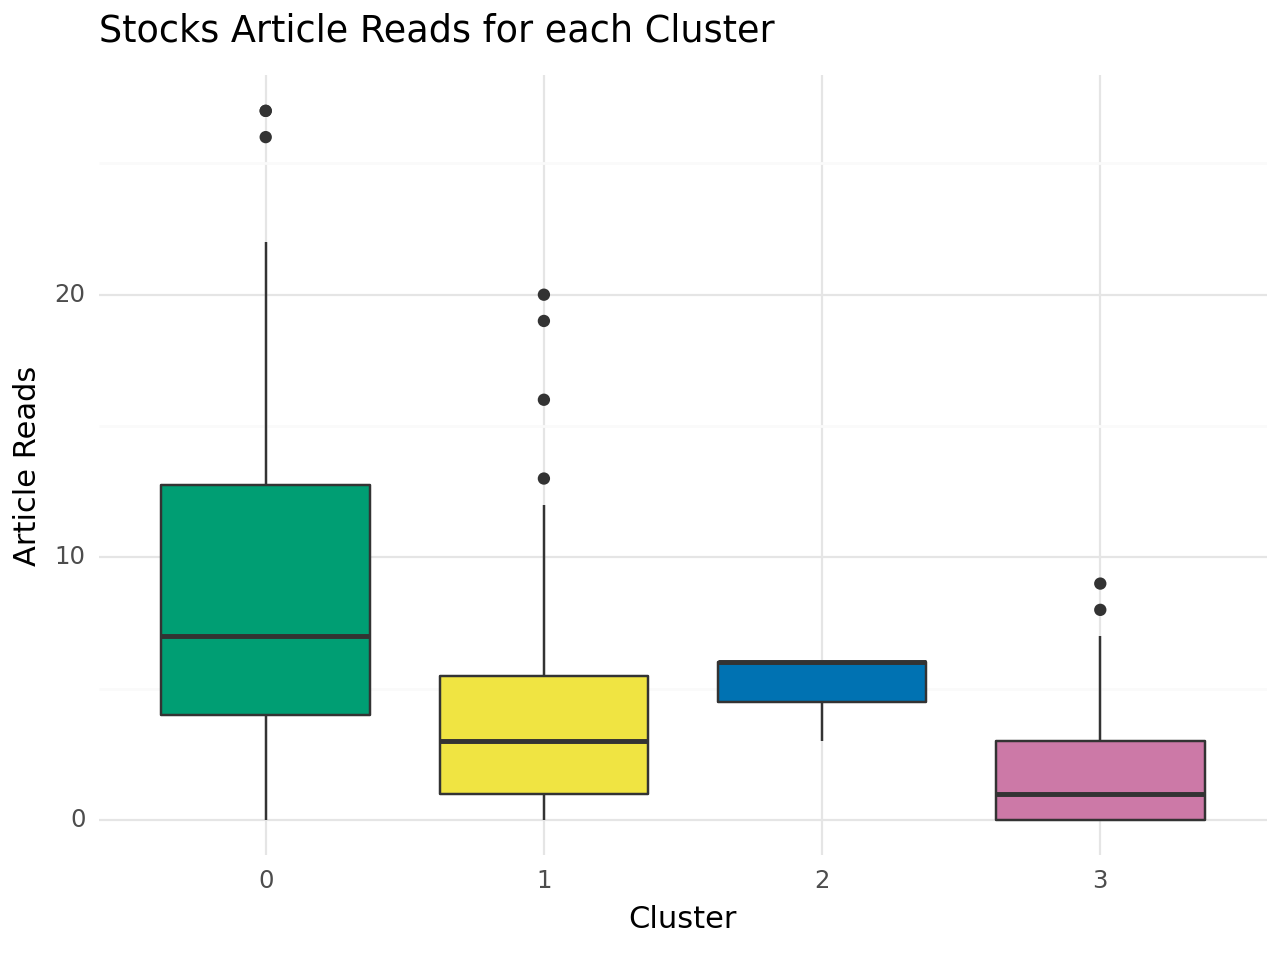

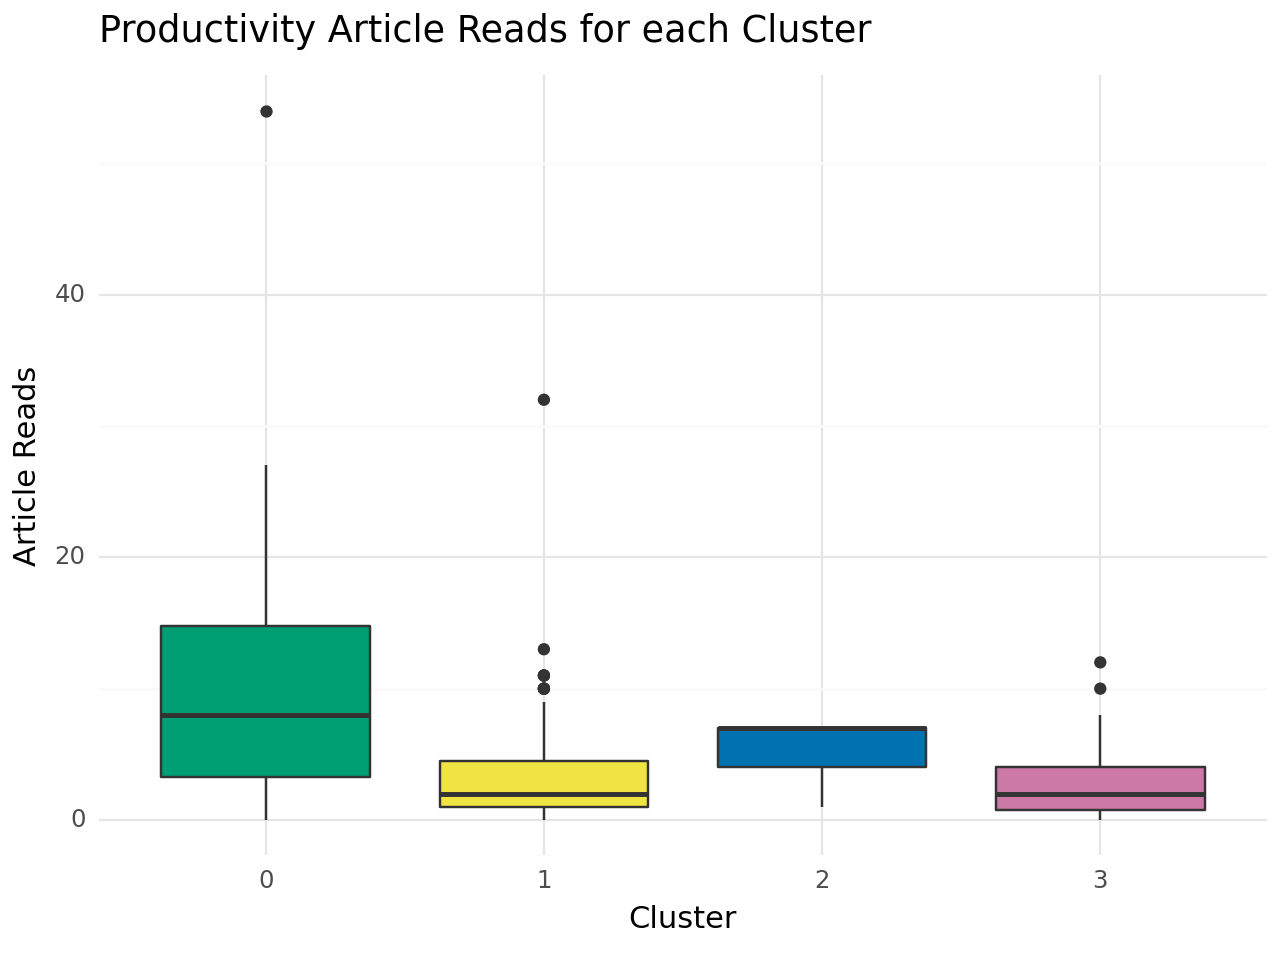

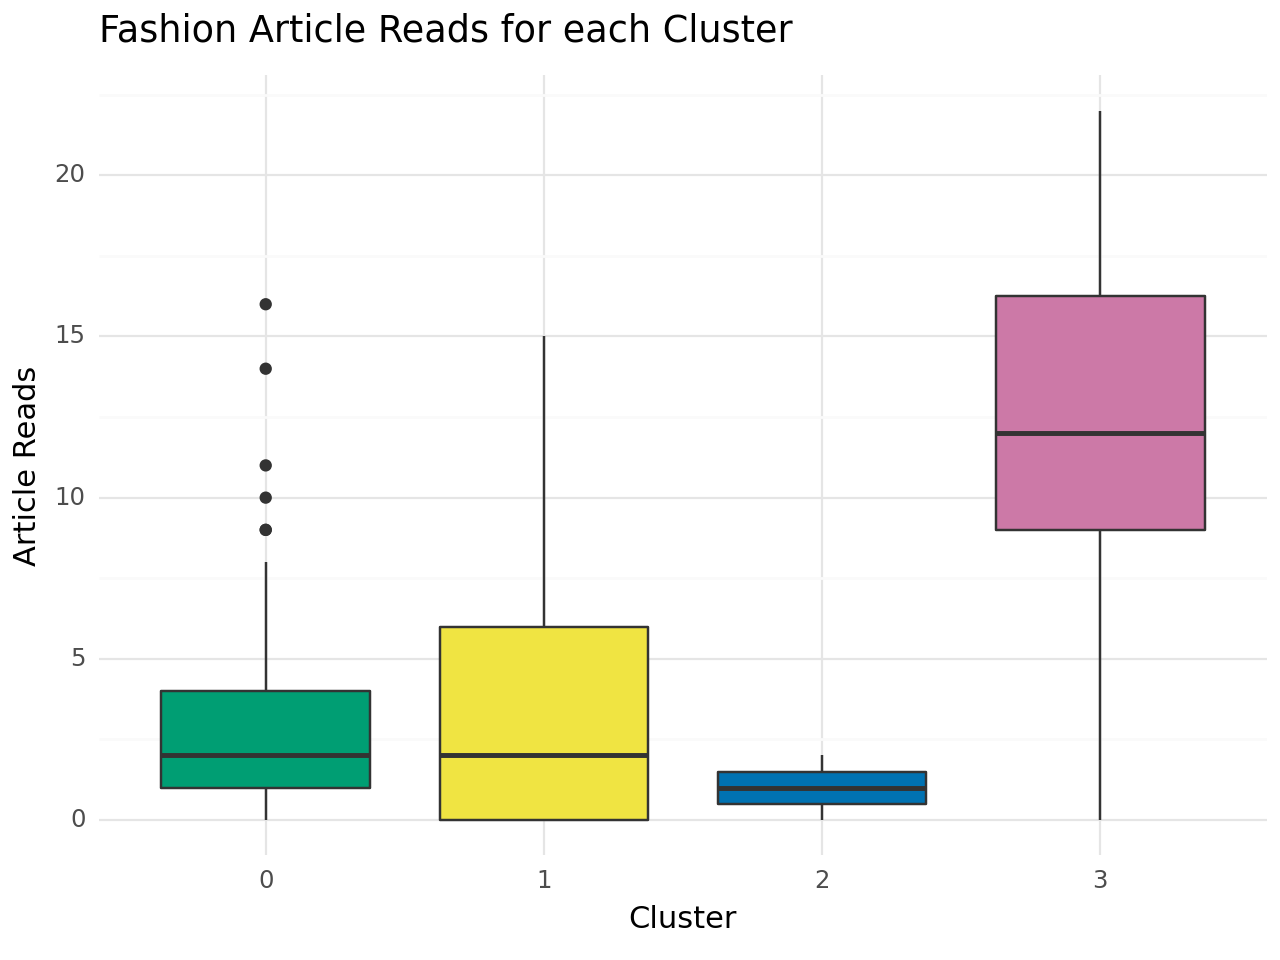

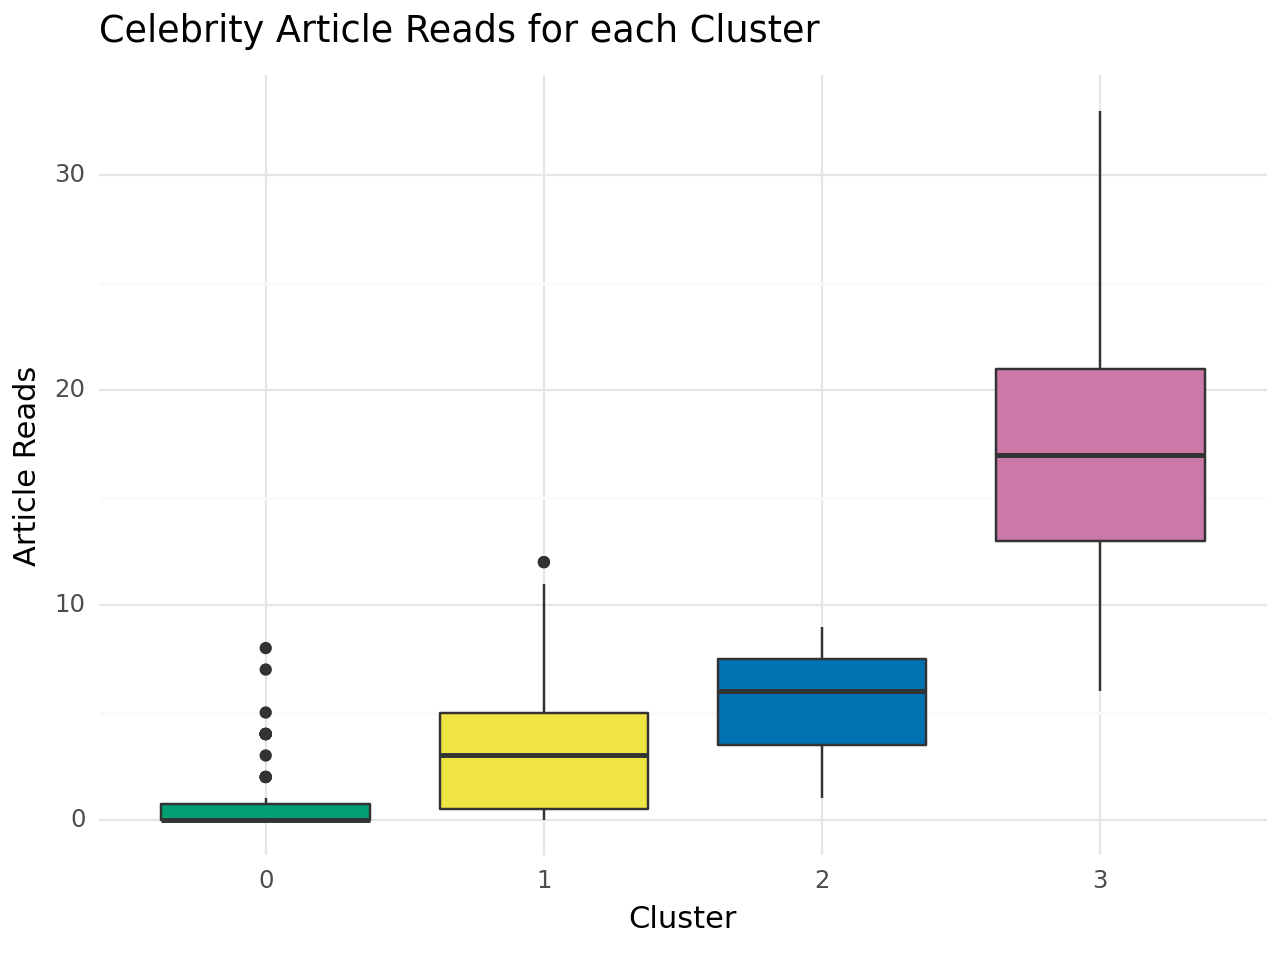

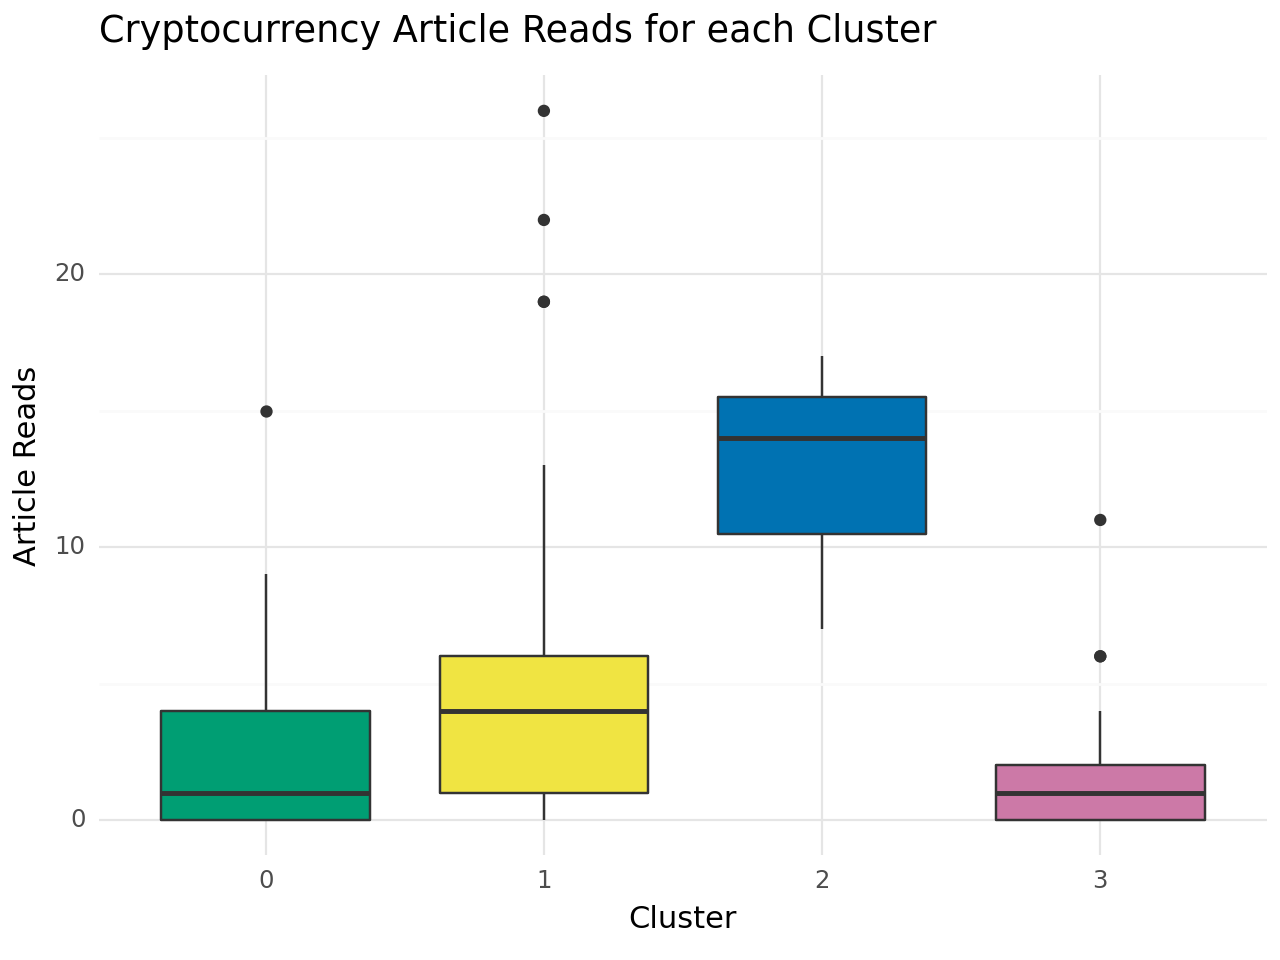

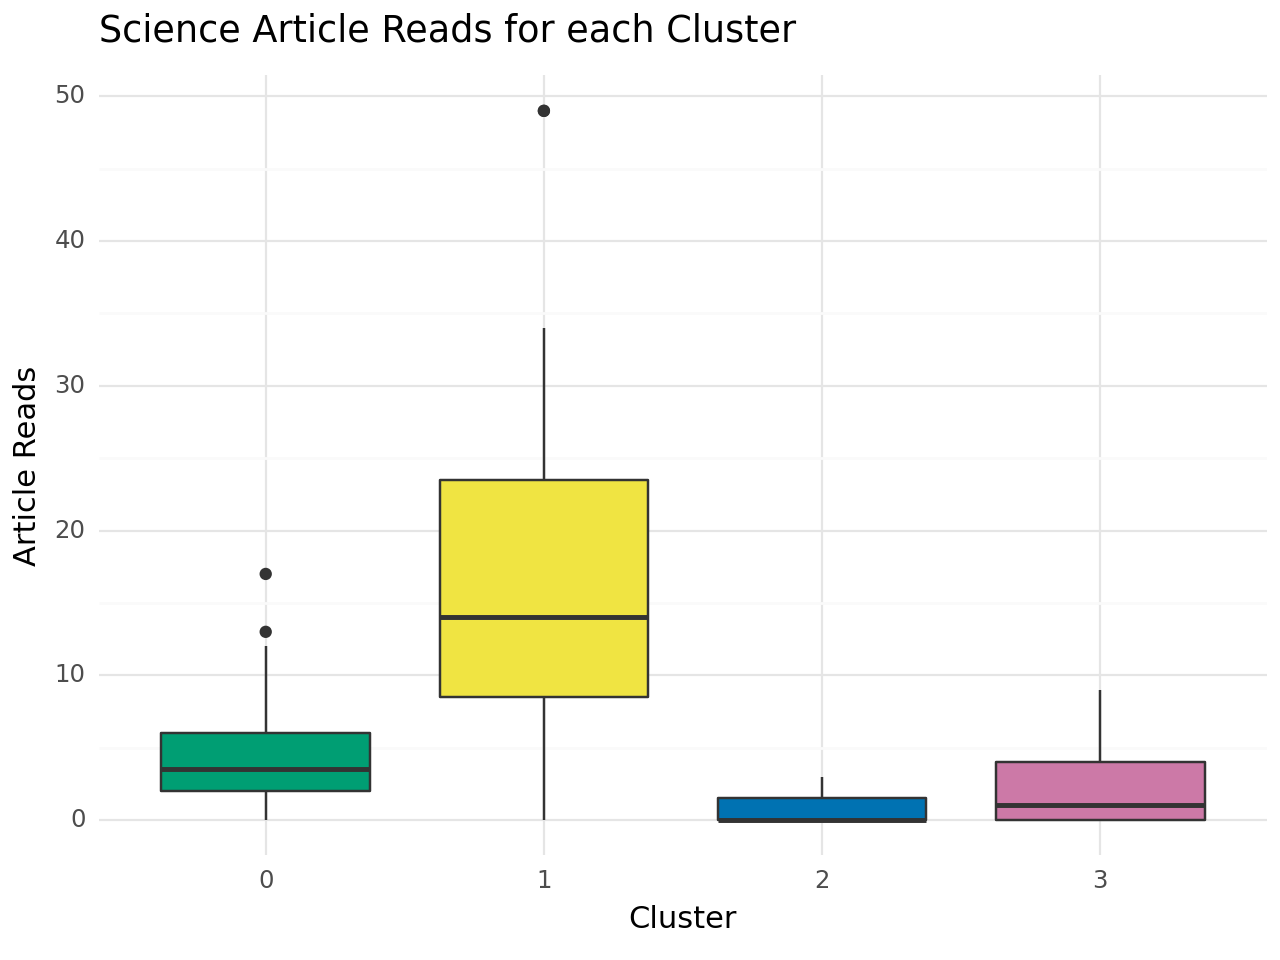

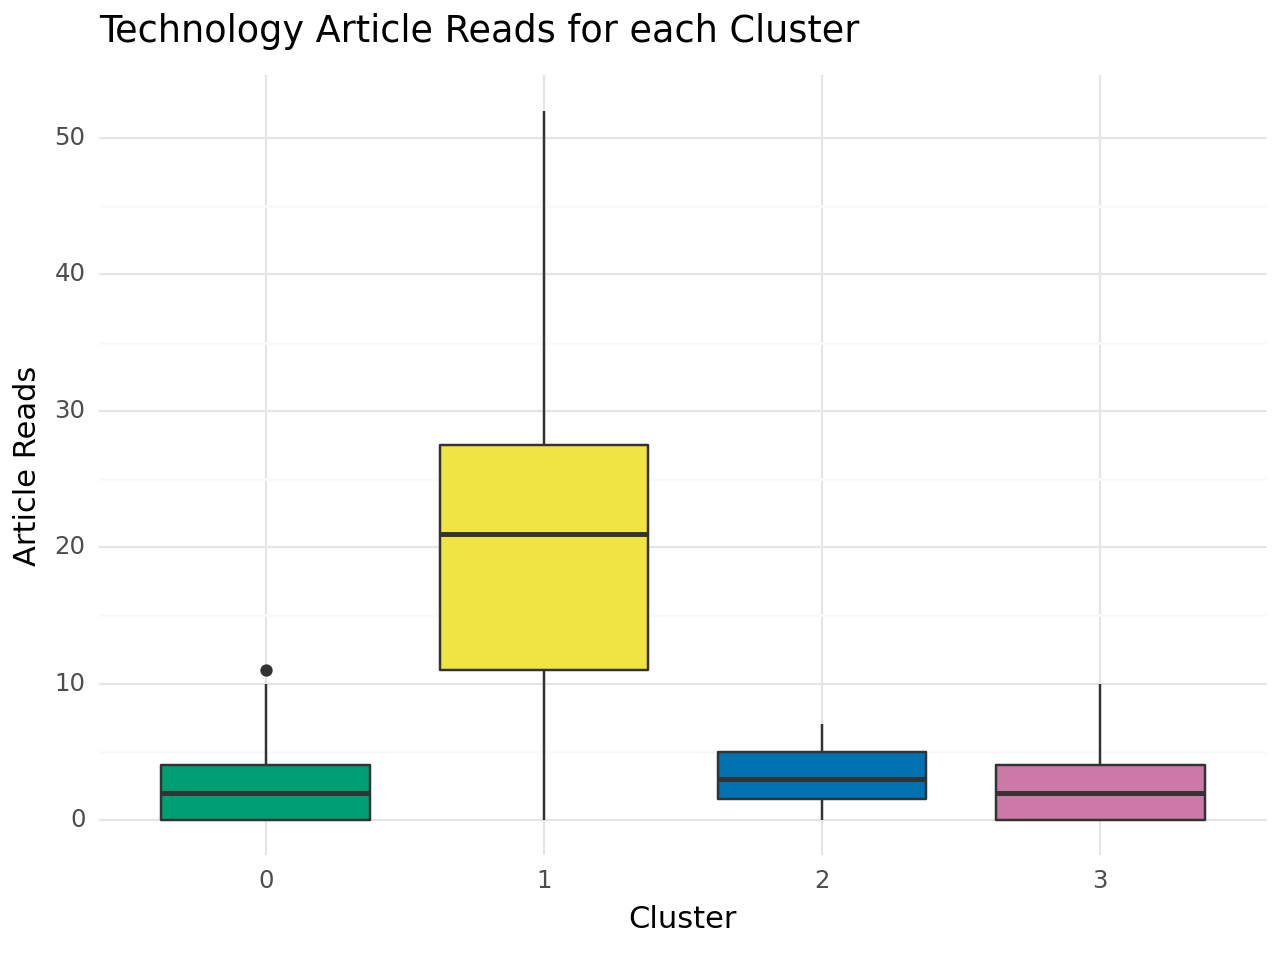

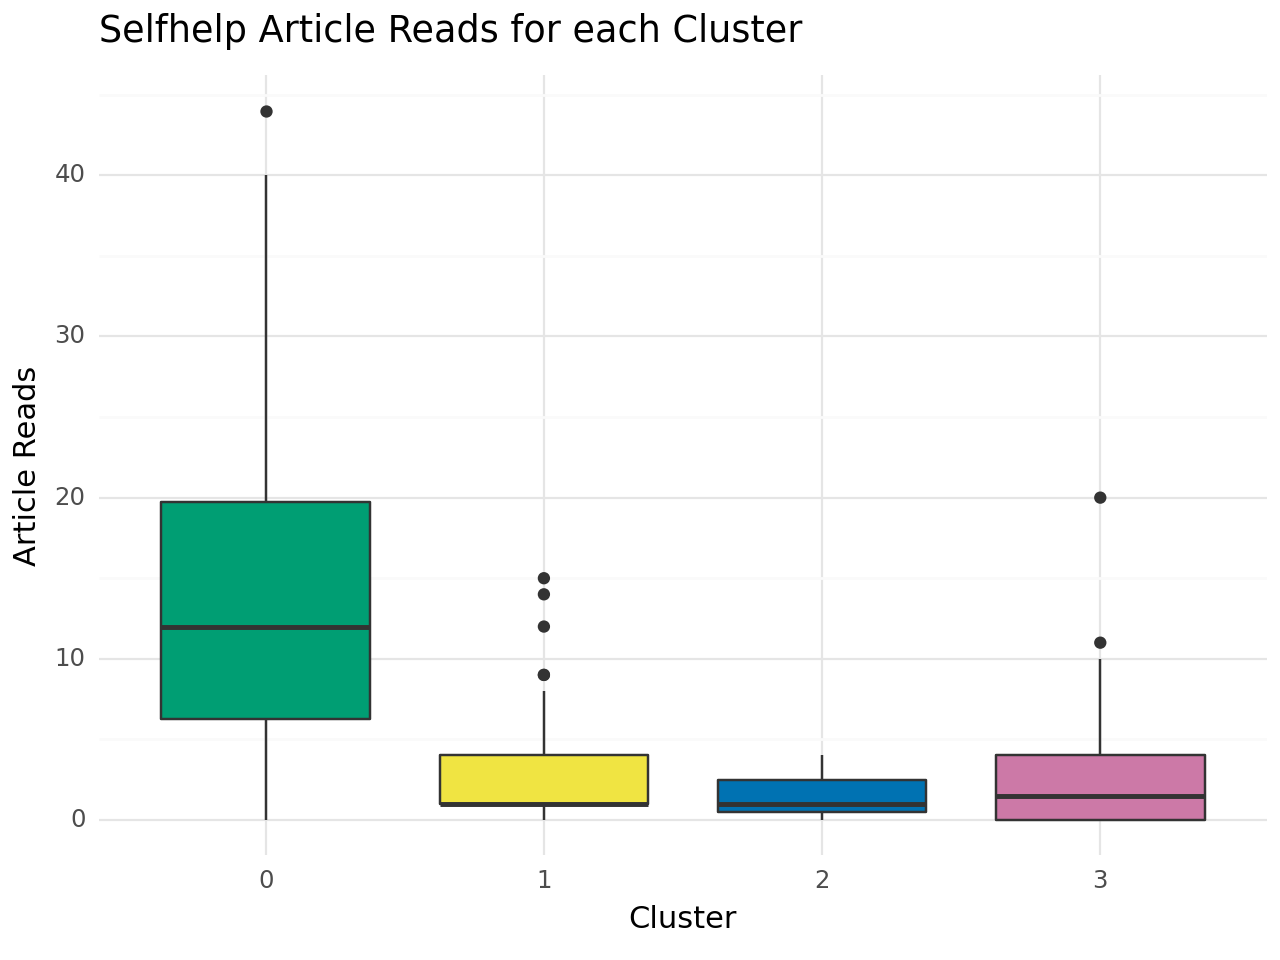

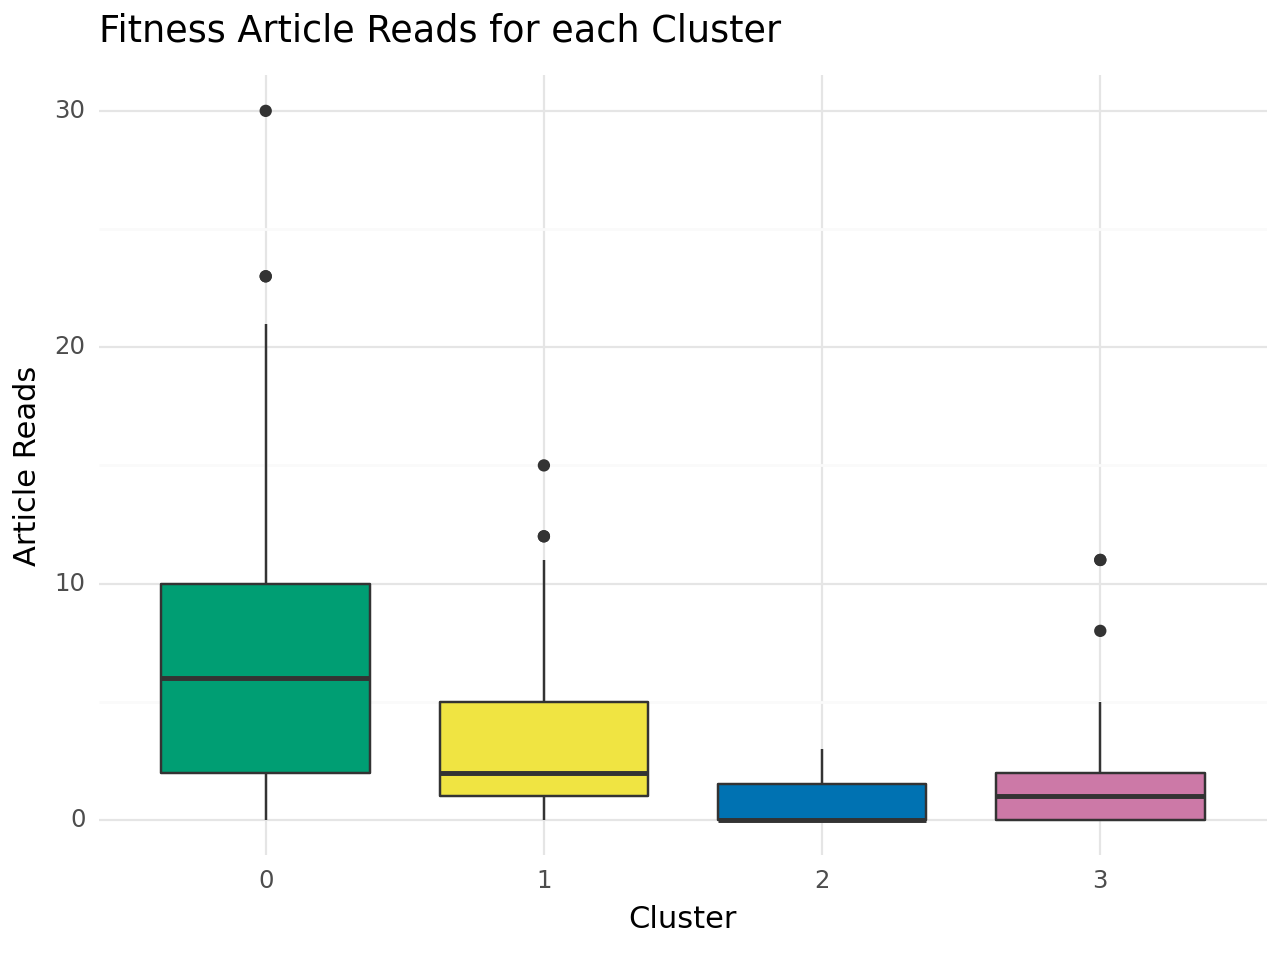

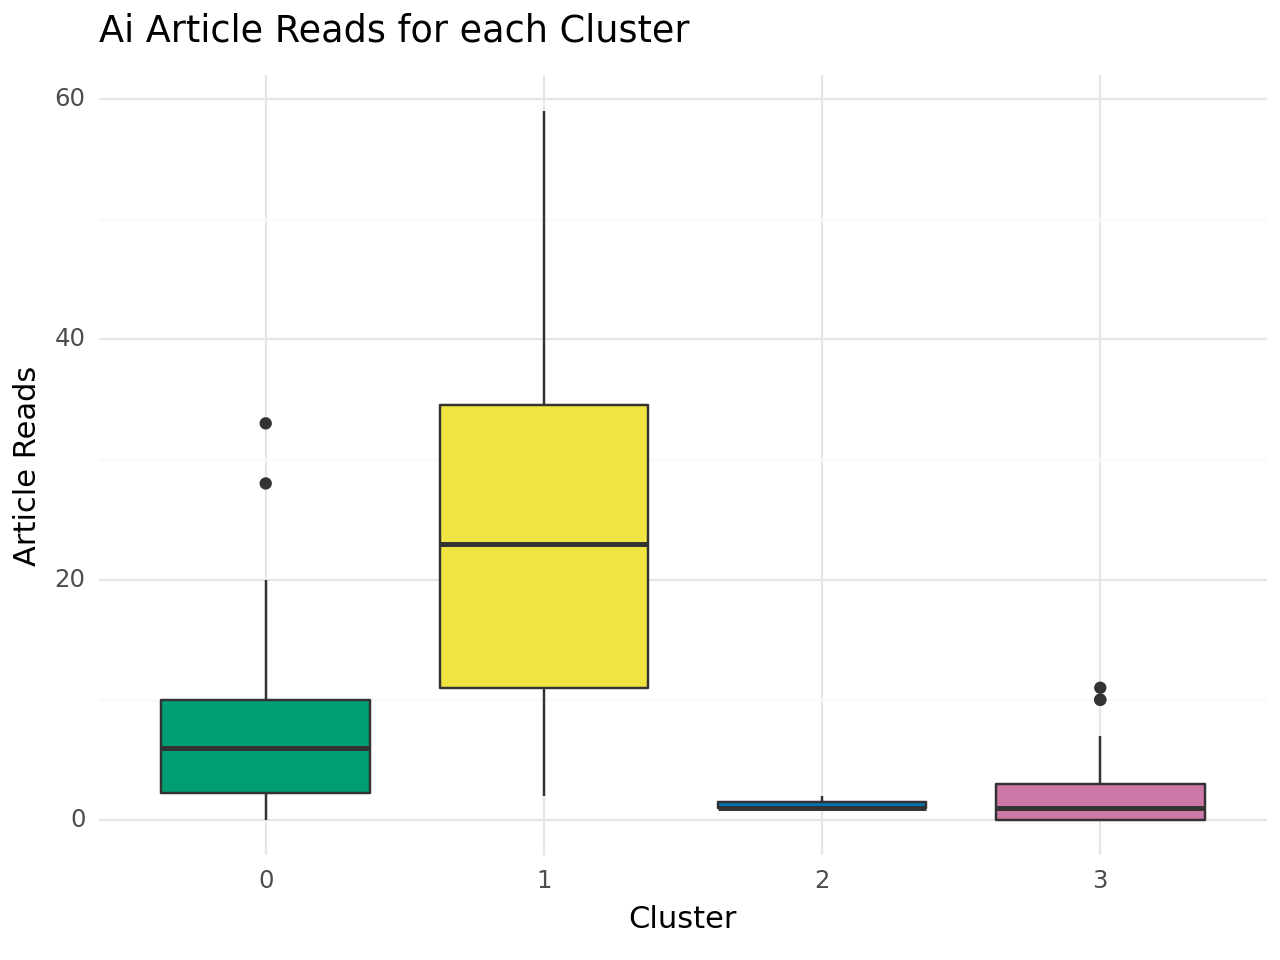

In [ ]:
hac = AgglomerativeClustering(affinity = "cosine",
                             linkage = "average",
                             n_clusters = 4) # come back and change the number of clusters

pipe2 = Pipeline([("model", hac)])


# fit model and get labels
labels = pipe2.fit_predict(X)

# look at cluster performance
print(silhouette_score(X, labels))
article["cluster_4"] = labels

for read in variables:
    title = read.capitalize() + " Article Reads for each Cluster"
    print(ggplot(article, aes(x="factor(cluster_4)", y=read)) +
            geom_boxplot(fill=["#009e73", "#f0e442", "#0072b2", "#cc79a7"]) +
            theme_minimal() +
            labs(x="Cluster", y="Article Reads", title=title))

## STEP 3
In the Results section, discuss the performance of the model based on the dendrogram.

## STEP 4
Create at least one other summary of what kind of customers are in each cluster. This could be a different ggplot (built using plotnine), or a neatly formatted summary table (hint: groupby()). In the Results section, discuss in detail what kind of customers are in each cluster, and how that information might help the company.

In [ ]:
article.head()
article.columns

Index(['Stocks', 'Productivity', 'Fashion', 'Celebrity', 'Cryptocurrency',
       'Science', 'Technology', 'SelfHelp', 'Fitness', 'AI', 'id',
       'cluster_4'],
      dtype='object')

In [ ]:
# CLUSTERS
cluster0 = article.groupby("cluster_4").get_group(0)
cluster1 = article.groupby("cluster_4").get_group(1)
cluster2 = article.groupby("cluster_4").get_group(2)
cluster3 = article.groupby("cluster_4").get_group(3)

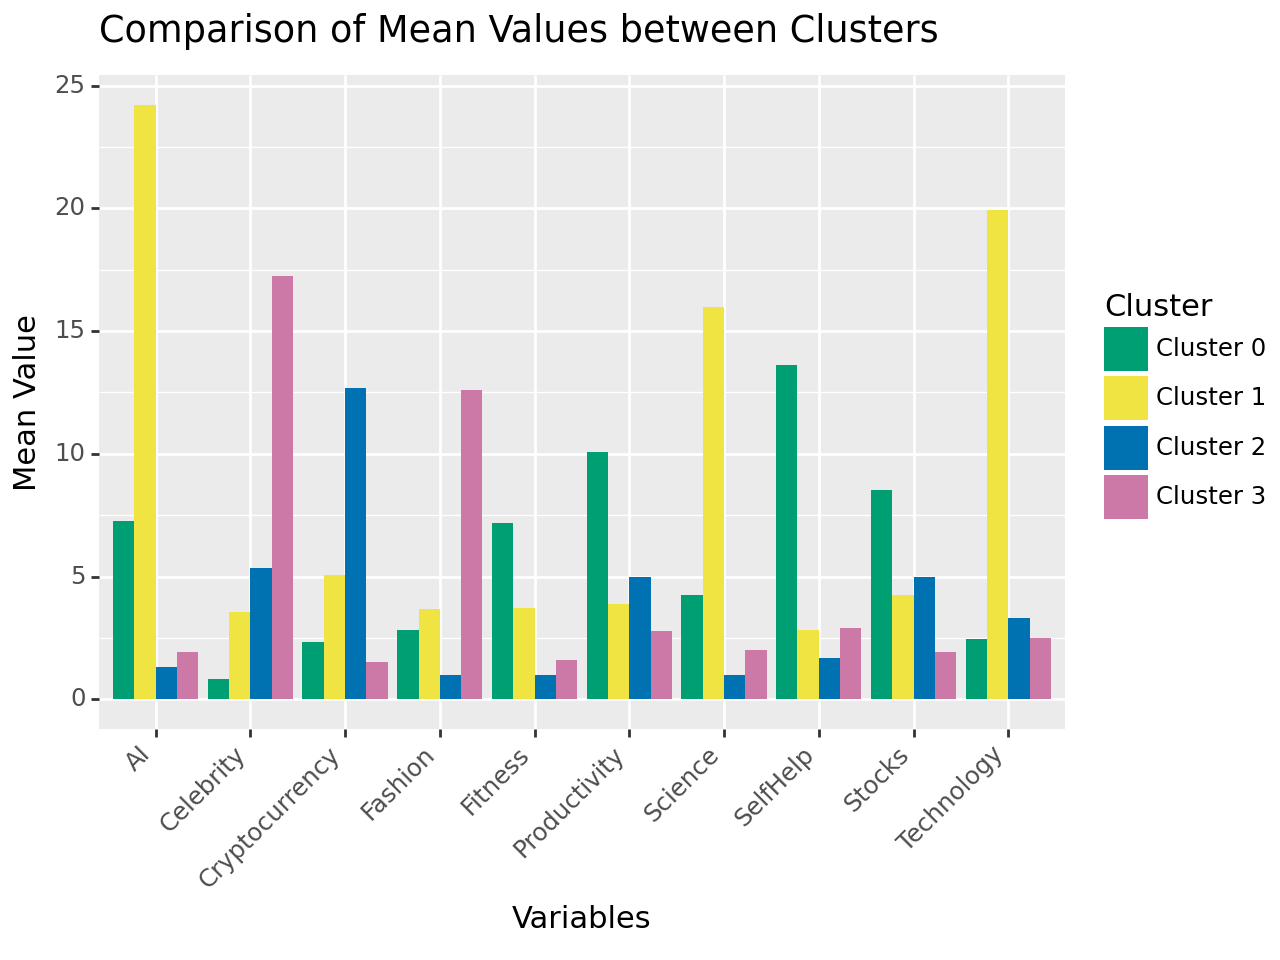

<Figure Size: (640 x 480)>

In [ ]:
# Assuming 'cluster0' and 'cluster1...3' are your pandas DataFrames
# Extract mean values for each cluster
cluster0 = cluster0[['Stocks', 'Productivity', 'Fashion', 'Celebrity', 'Cryptocurrency', 'Science', 'Technology', 'SelfHelp', 'Fitness', 'AI']]
cluster1 = cluster1[['Stocks', 'Productivity', 'Fashion', 'Celebrity', 'Cryptocurrency', 'Science', 'Technology', 'SelfHelp', 'Fitness', 'AI']]
cluster2 = cluster2[['Stocks', 'Productivity', 'Fashion', 'Celebrity', 'Cryptocurrency', 'Science', 'Technology', 'SelfHelp', 'Fitness', 'AI']]
cluster3 = cluster3[['Stocks', 'Productivity', 'Fashion', 'Celebrity', 'Cryptocurrency', 'Science', 'Technology', 'SelfHelp', 'Fitness', 'AI']]

group0_means = cluster0.mean().reset_index()
group1_means = cluster1.mean().reset_index()
group2_means = cluster2.mean().reset_index()
group3_means = cluster3.mean().reset_index()

# Melt the DataFrames to long format for ggplot
group0_melted = pd.melt(group0_means, id_vars=['index'])
group1_melted = pd.melt(group1_means, id_vars=['index'])
group2_melted = pd.melt(group2_means, id_vars=['index'])
group3_melted = pd.melt(group3_means, id_vars=['index'])

# Add a column to distinguish between the two clusters
group0_melted['cluster'] = 'Cluster 0'
group1_melted['cluster'] = 'Cluster 1'
group2_melted['cluster'] = 'Cluster 2'
group3_melted['cluster'] = 'Cluster 3'

# Combine the two melted DataFrames
combined_means = pd.concat([group0_melted, group1_melted, group2_melted, group3_melted])

# Create a side-by-side bar plot
(ggplot(combined_means, aes(x='index', y='value', fill='cluster')) +
  geom_bar(stat='identity', position='dodge') +
  scale_fill_manual(values=["#009e73", "#f0e442", "#0072b2","#cc79a7"]) +  # Adjust the color values as needed
  labs(title='Comparison of Mean Values between Clusters',
       x='Variables', y='Mean Value', fill='Cluster') +
  theme(axis_text_x=element_text(angle=45, hjust=1)))

In [ ]:
summary_table0 = cluster0.agg({
    'Stocks': ['mean', 'std'],
    'Productivity': ['mean', 'std'],
    'Fashion': ['mean', 'std'],
    'Celebrity': ['mean', 'std'],
    'Cryptocurrency': ['mean', 'std'],
    'Science': ['mean', 'std'],
    'Technology': ['mean', 'std'],
    'SelfHelp': ['mean', 'std'],
    'Fitness': ['mean', 'std'],
    'AI': ['mean', 'std']
})
print("Cluster 0 Customers \n------")
print(summary_table0)

Cluster 0 Customers 
------
        Stocks  Productivity   Fashion  Celebrity  Cryptocurrency   Science  \
mean  8.538462     10.076923  2.833333   0.820513        2.346154  4.243590   
std   6.681419      8.882742  3.304529   1.718831        2.895706  3.579109   

      Technology   SelfHelp   Fitness        AI  
mean    2.461538  13.628205  7.179487  7.269231  
std     2.531322   9.866787  6.270408  6.551837  


In [ ]:
summary_table1 = cluster1.agg({
    'Stocks': ['mean', 'std'],
    'Productivity': ['mean', 'std'],
    'Fashion': ['mean', 'std'],
    'Celebrity': ['mean', 'std'],
    'Cryptocurrency': ['mean', 'std'],
    'Science': ['mean', 'std'],
    'Technology': ['mean', 'std'],
    'SelfHelp': ['mean', 'std'],
    'Fitness': ['mean', 'std'],
    'AI': ['mean', 'std']
})
print("Cluster 1 Customers \n------")
print(summary_table1)

Cluster 1 Customers 
------
        Stocks  Productivity   Fashion  Celebrity  Cryptocurrency    Science  \
mean  4.253968      3.888889  3.682540   3.539683        5.063492  15.984127   
std   4.627994      5.026097  4.398773   3.495737        5.482738  10.872416   

      Technology  SelfHelp   Fitness         AI  
mean   19.920635  2.809524  3.730159  24.206349  
std    12.521339  3.373794  3.597519  14.207175  


In [ ]:
summary_table2 = cluster2.agg({
    'Stocks': ['mean', 'std'],
    'Productivity': ['mean', 'std'],
    'Fashion': ['mean', 'std'],
    'Celebrity': ['mean', 'std'],
    'Cryptocurrency': ['mean', 'std'],
    'Science': ['mean', 'std'],
    'Technology': ['mean', 'std'],
    'SelfHelp': ['mean', 'std'],
    'Fitness': ['mean', 'std'],
    'AI': ['mean', 'std']
})
print("Cluster 2 Customers \n------")
print(summary_table2)

Cluster 2 Customers 
------
        Stocks  Productivity  Fashion  Celebrity  Cryptocurrency   Science  \
mean  5.000000      5.000000      1.0   5.333333       12.666667  1.000000   
std   1.732051      3.464102      1.0   4.041452        5.131601  1.732051   

      Technology  SelfHelp   Fitness        AI  
mean    3.333333  1.666667  1.000000  1.333333  
std     3.511885  2.081666  1.732051  0.577350  


In [ ]:
summary_table3 = cluster3.agg({
    'Stocks': ['mean', 'std'],
    'Productivity': ['mean', 'std'],
    'Fashion': ['mean', 'std'],
    'Celebrity': ['mean', 'std'],
    'Cryptocurrency': ['mean', 'std'],
    'Science': ['mean', 'std'],
    'Technology': ['mean', 'std'],
    'SelfHelp': ['mean', 'std'],
    'Fitness': ['mean', 'std'],
    'AI': ['mean', 'std']
})
print("Cluster 3 Customers \n------")
print(summary_table3)

Cluster 3 Customers 
------
        Stocks  Productivity    Fashion  Celebrity  Cryptocurrency   Science  \
mean  1.910714      2.767857  12.607143  17.250000        1.517857  2.000000   
std   2.399066      2.743528   4.927395   5.834848        1.963217  2.182576   

      Technology  SelfHelp   Fitness        AI  
mean    2.517857  2.892857  1.607143  1.928571  
std     2.586616  3.783594  2.461918  2.702572  
